# Das funktioniert mit latex übertragung und ist das gute"!!!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tabulate as tabulate
import matplotlib.colors as mcolors
from IPython.core.display import HTML
from tabulate import tabulate
from bs4 import BeautifulSoup
import requests
import re
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [13]:
###Definitionssachen
#WICHTIG: für sim pattern ist die reihenfolge so wie in assignment und hier im programm
#WICHTIG:  für proj pattern ist die reihenfolge die reihenfolge von era5 historical
scenario=""
if scenario=="ssp2_":
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="":
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G", "MIROC6", "MIROC-ES2L",
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
    #models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
    #     "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G", "MIROC6", "MIROC-ES2L", 
     #    "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NESM3", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="ssp1_":
    models=["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp1
          "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6",
          "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0","NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="ssp3_":
    models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1",  #ssp3
          "GFDL-ESM4", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6",  "MPI-ESM1-2-LR", "MRI-ESM2-0", "UKESM1-0-LL"]
elif scenario=="hist":
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G", "MIROC6", "MIROC-ES2L",
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
    scenario=""
else:
    print("wählen scenario aus")
aufgabe = "Projected patterns"#"Projected patterns"
def styling_specific_cell1(x,row_idx,col_idx):
    color = style_df_cl1.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell2(x,row_idx,col_idx):
    color = style_df_cl2.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell3(x,row_idx,col_idx):
    color = style_df_cl3.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell4(x,row_idx,col_idx):
    color = style_df_cl4.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell5(x,row_idx,col_idx):
    color = style_df_cl5.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def significance_decider(val,signi, minmax):
        if signi<minmax[4]:
            return 'background-color: darkblue; color: white'
        elif signi>minmax[5]:
            return 'background-color: darkred; color: white'
        elif signi>minmax[4] and signi<minmax[2]:
            return 'background-color: blue; color: white'
        elif signi>minmax[2] and signi<minmax[0]:
            return 'background-color: skyblue; color: black'
        elif signi<minmax[5] and signi>minmax[3]:
            return 'background-color: red; color: black'
        elif signi<minmax[3] and signi>minmax[1]:
            return 'background-color: orange; color: black'
        else:
            return 'background-color: white; color: black'
seas="mjjaso"
months=6
cluster = 5
months_name=[5,6,7,8,9,10]
month_len=[31,30,31,31,30,31]
months_official=["May","June","July","August","September","October"]
days_per_year=sum(month_len)
years=30
days_per_period=days_per_year*years
years_hist="1985-2014"
years_proj="1985-2014"
years_proj2="1985-2014"
years_fut="2070-2099"
area="0_360"
region="arctic"
if region=="paz":
    cl1={}
    cl2={}
    cl3={}
    cl4={}
    #cl5={}
    #cl6={}#
elif region=="arctic":
    cl1={}
    cl2={}
    cl3={}
    cl4={}
    cl5={}
    cl6={}#
    cl7={}
    cl8={}
    cl9={}#
else:
    atl={}
    scan={}
    naoplus={}
    naominus={}
    #atl_e={}#
    dipol={}

counts_hist = {}
counts_fut = {}
occurence_hist = {}
occurence_fut={}
difference_cl1={}
difference_cl2={}
difference_cl3={}
difference_cl4={}
difference_cl5={}
difference_cl6={}#
# difference_cl7={}
# difference_cl8={}
# difference_cl9={}#

historisch_cl1={}
historisch_cl2={}
historisch_cl3={}
historisch_cl4={}
historisch_cl5={}
historisch_cl6={}#
# historisch_cl7={}
# historisch_cl8={}
# historisch_cl9={}#

style_dict_cl1 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl1[column_name]= np.array([])
style_dict_cl1['all']=np.array([])

style_dict_cl2 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl2[column_name]= np.array([])
style_dict_cl2['all']=np.array([])

style_dict_cl3 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl3[column_name]= np.array([])
style_dict_cl3['all']=np.array([])

style_dict_cl4 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl4[column_name]= np.array([])
style_dict_cl4['all']=np.array([])

style_dict_cl5 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl5[column_name]= np.array([])
style_dict_cl5['all']=np.array([])

style_dict_cl6 = {}#
for month in range(0,months):#
    column_name=str(months_official[month])#
    style_dict_cl6[column_name]= np.array([])#
style_dict_cl6['all']=np.array([])#

# style_dict_cl7 = {}
# for month in range(0,months):
#     column_name=str(months_official[month])
#     style_dict_cl7[column_name]= np.array([])
# style_dict_cl7['all']=np.array([])

# style_dict_cl8 = {}
# for month in range(0,months):
#     column_name=str(months_official[month])
#     style_dict_cl8[column_name]= np.array([])
# style_dict_cl8['all']=np.array([])

# style_dict_cl9 = {}#
# for month in range(0,months):#
#     column_name=str(months_official[month])#
#     style_dict_cl9[column_name]= np.array([])#
# style_dict_cl9['all']=np.array([])#


if aufgabe == "Simulated patterns":
    #model="ACCESS-CM2"
    for model in range(len(models)):
        path_2="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/"
        path="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/"
        datei_signi=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj2+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_"+cluster+"cluster10PC_high_low.month.signif_bootstrap.txt"
        datei_minmax=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj2+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_"+cluster+"cluster10PC_high_low.month.signif_bootstrap_minmaxwhiskers.txt"
        datei_assignment_hist=r"Assignment_"+region+"_historical"+years_hist+"_"+seas+".txt"
        datei_assignment_fut=r"Assignment_"+region+"_future"+scenario+years_fut+"_"+seas+".txt"
        assignment_hist=pd.read_csv("N:/atm_glomod/user/jomuel001/auswertung/TAYLOR/Cluster/"+datei_assignment_hist,delimiter="\t")
        assignment_fut=pd.read_csv("N:/atm_glomod/user/jomuel001/auswertung/TAYLOR/Cluster/"+datei_assignment_fut,delimiter="\t")
        #cluster werden zu era5 zugeordnet
        datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_"+cluster+"tabcluster_10tabPC_dates"
        datei_occ_fut=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".N_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_"+cluster+"tabcluster_10tabPC_dates"

        significance=np.array(pd.read_csv(path+datei_signi, delimiter=' '))[~np.isnan(np.array(pd.read_csv(path+datei_signi, delimiter=' ')))].reshape(months,cluster)
        minmaxwhiskers=np.array(pd.read_csv(path+datei_minmax, delimiter=' '))[~np.isnan(np.array(pd.read_csv(path+datei_minmax, delimiter=' ')))].reshape(months,cluster,6)
        occurence_hist['all']=np.loadtxt(path_2+datei_occ_hist, delimiter=' ')
        occurence_fut['all']=np.loadtxt(path_2+datei_occ_fut, delimiter=' ')
        counts_hist['all']=np.bincount(np.round(occurence_hist['all'][:,3]).astype(int))/(days_per_period)
        counts_fut['all']=np.bincount(np.round(occurence_fut['all'][:,3]).astype(int))/(days_per_period)

        for month in range(0,months):
            occurence_hist[str(months_official[month])]=np.array([])
            occurence_fut[str(months_official[month])]=np.array([])
            for entry in range(len(occurence_hist['all'])):
                if occurence_hist['all'][entry,1]==months_name[month]:
                    occurence_hist[str(months_official[month])]=np.append(occurence_hist[str(months_official[month])],(occurence_hist['all'][entry,:]))
                    occurence_fut[str(months_official[month])]=np.append(occurence_fut[str(months_official[month])],(occurence_fut['all'][entry,:]))
            occurence_hist[str(months_official[month])]= np.reshape(occurence_hist[str(months_official[month])], (int(len(occurence_hist[str(months_official[month])])/6),6))
            occurence_fut[str(months_official[month])]= np.reshape(occurence_fut[str(months_official[month])], (int(len(occurence_fut[str(months_official[month])])/6),6))
            counts_hist[str(months_official[month])]=np.bincount(np.round(occurence_hist[str(months_official[month])][:,3]).astype(int))/(years*month_len[month])
            counts_fut[str(months_official[month])]=np.bincount(np.round(occurence_fut[str(months_official[month])][:,3]).astype(int))/(years*month_len[month]) #bei zweimodellen gibt es 120 0zuweisungen
            if counts_hist[str(months_official[month])][0]>0:
                print(models[model]+" da sind 120 falschzuweisungen")
        for month in range(0,months):
            if model==0:
                difference_cl1[str(months_official[month])]=np.array([])
                difference_cl2[str(months_official[month])]=np.array([])
                difference_cl3[str(months_official[month])]=np.array([])
                difference_cl4[str(months_official[month])]=np.array([])
                difference_cl5[str(months_official[month])]=np.array([])
                difference_cl6[str(months_official[month])]=np.array([])#
                difference_cl7[str(months_official[month])]=np.array([])
                difference_cl8[str(months_official[month])]=np.array([])
                difference_cl9[str(months_official[month])]=np.array([])#
            else:
                pass
            difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],counts_fut[str(months_official[month])][assignment_fut['CL1/SCAN'][model]]-counts_hist[str(months_official[month])][assignment_hist['CL1/SCAN'][model]])
            difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],counts_fut[str(months_official[month])][assignment_fut['CL2/NAO+'][model]]-counts_hist[str(months_official[month])][assignment_hist['CL2/NAO+'][model]])
            difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],counts_fut[str(months_official[month])][assignment_fut['CL3/NAO-'][model]]-counts_hist[str(months_official[month])][assignment_hist['CL3/NAO-'][model]])
            difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],counts_fut[str(months_official[month])][assignment_fut['CL4/DIPOL'][model]]-counts_hist[str(months_official[month])][assignment_hist['CL4/DIPOL'][model]])
            #difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],counts_fut[str(months_official[month])][assignment_fut['CL5/ATL'][model]]-counts_hist[str(months_official[month])][assignment_hist['CL5/ATL'][model]])
            #difference_cl6[str(months_official[month])]=np.append(difference_cl6[str(months_official[month])],counts_fut[str(months_official[month])][assignment_fut['CL6/'][model]]-counts_hist[str(months_official[month])][assignment_hist['CL5/ATL'][model]])#
        if model==0:
            difference_cl1['all']=np.array([])
            difference_cl2['all']=np.array([])
            difference_cl3['all']=np.array([])
            difference_cl4['all']=np.array([])
            difference_cl5['all']=np.array([])
            
            historisch_cl1['all']=np.array([])
            historisch_cl2['all']=np.array([])
            historisch_cl3['all']=np.array([])
            historisch_cl4['all']=np.array([])
            historisch_cl5['all']=np.array([])
        else:
            pass
        difference_cl1['all']=np.append(difference_cl1['all'],float(f"{counts_fut['all'][assignment_fut['CL1/SCAN'][model]]-counts_hist['all'][assignment_hist['CL1/SCAN'][model]]:.2f}"))
        difference_cl2['all']=np.append(difference_cl2['all'],float(f"{counts_fut['all'][assignment_fut['CL2/NAO+'][model]]-counts_hist['all'][assignment_hist['CL2/NAO+'][model]]:.2f}"))
        difference_cl3['all']=np.append(difference_cl3['all'],float(f"{counts_fut['all'][assignment_fut['CL3/NAO-'][model]]-counts_hist['all'][assignment_hist['CL3/NAO-'][model]]:.2f}"))
        difference_cl4['all']=np.append(difference_cl4['all'],float(f"{counts_fut['all'][assignment_fut['CL4/DIPOL'][model]]-counts_hist['all'][assignment_hist['CL4/DIPOL'][model]]:.2f}"))
        difference_cl5['all']=np.append(difference_cl5['all'],float(f"{counts_fut['all'][assignment_fut['CL5/ATL'][model]]-counts_hist['all'][assignment_hist['CL5/ATL'][model]]:.2f}"))
        
        
        #significance: spalten sind die cl, zeilen die monate, alles in 6x5 arrays
        #minmax: zuerst 5 cl dann nächster monat dann 5 cl dann nächster monat von cl1 nach cl5, alles in 6x5 arrays
        table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+1]).transpose()
        #break()
        #hier durchschnittbilden
        if model==len(models)-1:
            difference_cl1['all']=np.append(difference_cl1['all'], np.mean(difference_cl1['all']))
            difference_cl2['all']=np.append(difference_cl2['all'], np.mean(difference_cl2['all']))
            difference_cl3['all']=np.append(difference_cl3['all'], np.mean(difference_cl3['all']))
            difference_cl4['all']=np.append(difference_cl4['all'], np.mean(difference_cl4['all']))
            difference_cl5['all']=np.append(difference_cl5['all'], np.mean(difference_cl5['all']))                           
            for month in range(0,months):
                difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],np.mean(difference_cl1[str(months_official[month])]))
                difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],np.mean(difference_cl2[str(months_official[month])]))
                difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],np.mean(difference_cl3[str(months_official[month])]))
                difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],np.mean(difference_cl4[str(months_official[month])]))
                difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],np.mean(difference_cl5[str(months_official[month])]))
            models.append('add')
            table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+2]).transpose().round(2)  
            models=models[:-2]
            
            
            table_difference_cl1_styled=table_difference_cl1.style.background_gradient(axis=None, vmin=-0.2, vmax=0.2, cmap="seismic").format('{:.2f}')
            table_difference_cl2_styled=table_difference_cl2.style.background_gradient(axis=None, vmin=-0.2, vmax=0.2, cmap="seismic").format('{:.2f}')
            table_difference_cl3_styled=table_difference_cl3.style.background_gradient(axis=None, vmin=-0.2, vmax=0.2, cmap="seismic").format('{:.2f}')
            table_difference_cl4_styled=table_difference_cl4.style.background_gradient(axis=None, vmin=-0.2, vmax=0.2, cmap="seismic").format('{:.2f}')
            table_difference_cl5_styled=table_difference_cl5.style.background_gradient(axis=None, vmin=-0.2, vmax=0.2, cmap="seismic").format('{:.2f}')
        #durchschnitt bilden vorbeistyler.format('{:.2f}')
        #jetzt die farben
       #for month in range(0,months): 
        #    styled_df = df.style.applymap(lambda x: significance_decider(x, significance[month,]))
            print(table_difference_cl1_styled)
            print(table_difference_cl2_styled)
            print(table_difference_cl3_styled)
            print(table_difference_cl4_styled)
            print(table_difference_cl5_styled)
            # render the styled dataframe as HTML with CSS formatting
            table_difference_cl1_styled.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+region+"_sim_cl1.tex",convert_css=True)
            table_difference_cl2_styled.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+region+"_sim_cl2.tex",convert_css=True)
            table_difference_cl3_styled.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+region+"_sim_cl3.tex",convert_css=True)
            table_difference_cl4_styled.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+region+"_sim_cl4.tex",convert_css=True)
            table_difference_cl5_styled.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+region+"_sim_cl5.tex",convert_css=True)
            
                
#####################################################################################################################################################################################################################################                   
#####################################################################################################################################################################################################################################
#####################################################################################################################################################################################################################################                   
#####################################################################################################################################################################################################################################
#####################################################################################################################################################################################################################################                   
#####################################################################################################################################################################################################################################

elif aufgabe == 'Projected patterns':
    for model in range(len(models)):
        if region=="arctic":
            path_2="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_49.3208/CLUSTER/"
            path="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_49.3208/CLUSTER/PLOTS/"
            datei_signi=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".North_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_"+str(cluster)+"cluster10PC_high_low.month.signif_bootstrap.txt"
            datei_minmax=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".North_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_"+str(cluster)+"cluster10PC_high_low.month.signif_bootstrap_minmaxwhiskers.txt"
            #cluster werden zu era5 zugeordnet
            datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".North_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_"+str(cluster)+"tabcluster_10tabPC_dates"
            datei_occ_fut=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".North_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_"+str(cluster)+"tabcluster_10tabPC_dates"
       
        else:
            path_2="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/"
            path="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/"
            datei_signi=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".N_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj2+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_"+str(cluster)+"cluster10PC_high_low.month.signif_bootstrap.txt"
            datei_minmax=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".N_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj2+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_"+str(cluster)+"cluster10PC_high_low.month.signif_bootstrap_minmaxwhiskers.txt"
            #cluster werden zu era5 zugeordnet
            datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj2+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_"+str(cluster)+"tabcluster_10tabPC_dates"
            datei_occ_fut=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".N_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj2+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_"+str(cluster)+"tabcluster_10tabPC_dates"
        significance=np.array(pd.read_csv(path+datei_signi, delimiter=' '))[~np.isnan(np.array(pd.read_csv(path+datei_signi, delimiter=' ')))].reshape(months,cluster)
        minmaxwhiskers=np.array(pd.read_csv(path+datei_minmax, delimiter=' '))[~np.isnan(np.array(pd.read_csv(path+datei_minmax, delimiter=' ')))].reshape(months,cluster,6)
        occurence_hist['all']=np.loadtxt(path_2+datei_occ_hist, delimiter=' ')
        occurence_fut['all']=np.loadtxt(path_2+datei_occ_fut, delimiter=' ')
       # print(occurence_hist['all'])
       # print(occurence_fut['all'])
        counts_hist['all']=np.bincount(np.round(occurence_hist['all'][:,3]).astype(int))/(days_per_period)
        counts_fut['all']=np.bincount(np.round(occurence_fut['all'][:,3]).astype(int))/(days_per_period)
        #print(counts_hist['all'])
        #print(counts_fut['all'])
        print(model)
        for month in range(0,months):
            occurence_hist[str(months_official[month])]=np.array([])
            occurence_fut[str(months_official[month])]=np.array([])
            for entry in range(len(occurence_hist['all'])):
                if occurence_hist['all'][entry,1]==months_name[month]:
                    occurence_hist[str(months_official[month])]=np.append(occurence_hist[str(months_official[month])],(occurence_hist['all'][entry,:]))
                    occurence_fut[str(months_official[month])]=np.append(occurence_fut[str(months_official[month])],(occurence_fut['all'][entry,:]))
            occurence_hist[str(months_official[month])]= np.reshape(occurence_hist[str(months_official[month])], (int(len(occurence_hist[str(months_official[month])])/6),6))
            occurence_fut[str(months_official[month])]= np.reshape(occurence_fut[str(months_official[month])], (int(len(occurence_fut[str(months_official[month])])/6),6))
            #print(occurence_hist['May'])
            #print(occurence_fut['May'])
            counts_hist[str(months_official[month])]=np.bincount(np.round(occurence_hist[str(months_official[month])][:,3]).astype(int))/(years*month_len[month])
            counts_fut[str(months_official[month])]=np.bincount(np.round(occurence_fut[str(months_official[month])][:,3]).astype(int))/(years*month_len[month]) #bei zweimodellen gibt es 120 0zuweisungen
            #print(years*month_len[month])
            #print(counts_hist['May'])
            #print(counts_fut['May'])
            if counts_hist[str(months_official[month])][0]>0:
                print(models[model]+" da sind 120 falschzuweisungen")
        for month in range(0,months):
            if model==0:
                difference_cl1[str(months_official[month])]=np.array([])
                difference_cl2[str(months_official[month])]=np.array([])
                difference_cl3[str(months_official[month])]=np.array([])
                difference_cl4[str(months_official[month])]=np.array([])
                difference_cl5[str(months_official[month])]=np.array([])
    #           difference_cl6[str(months_official[month])]=np.array([])#
#                 difference_cl7[str(months_official[month])]=np.array([])
#                 difference_cl8[str(months_official[month])]=np.array([])
#                 difference_cl9[str(months_official[month])]=np.array([])#
            else:
                pass
            difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],counts_fut[str(months_official[month])][1]*100-counts_hist[str(months_official[month])][1]*100)
            difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],counts_fut[str(months_official[month])][2]*100-counts_hist[str(months_official[month])][2]*100)
            difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],counts_fut[str(months_official[month])][3]*100-counts_hist[str(months_official[month])][3]*100)
            difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],counts_fut[str(months_official[month])][4]*100-counts_hist[str(months_official[month])][4]*100)
            difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],counts_fut[str(months_official[month])][5]*100-counts_hist[str(months_official[month])][5]*100)
  #         difference_cl6[str(months_official[month])]=np.append(difference_cl6[str(months_official[month])],counts_fut[str(months_official[month])][6]*100-counts_hist[str(months_official[month])][6]*100)#
#             difference_cl7[str(months_official[month])]=np.append(difference_cl7[str(months_official[month])],counts_fut[str(months_official[month])][7]*100-counts_hist[str(months_official[month])][7]*100)
#             difference_cl8[str(months_official[month])]=np.append(difference_cl8[str(months_official[month])],counts_fut[str(months_official[month])][8]*100-counts_hist[str(months_official[month])][8]*100)
#             difference_cl9[str(months_official[month])]=np.append(difference_cl9[str(months_official[month])],counts_fut[str(months_official[month])][9]*100-counts_hist[str(months_official[month])][9]*100)#
        if model==0:
            difference_cl1['all']=np.array([])
            difference_cl2['all']=np.array([])
            difference_cl3['all']=np.array([])
            difference_cl4['all']=np.array([])
            difference_cl5['all']=np.array([])
 #          difference_cl6['all']=np.array([])#
#             difference_cl7['all']=np.array([])
#             difference_cl8['all']=np.array([])
#             difference_cl9['all']=np.array([])#
            
            historisch_cl1['all']=np.array([])
            historisch_cl2['all']=np.array([])
            historisch_cl3['all']=np.array([])
            historisch_cl4['all']=np.array([])             
            historisch_cl5['all']=np.array([])
 #          historisch_cl6['all']=np.array([])#
#             historisch_cl7['all']=np.array([])
#             historisch_cl8['all']=np.array([])
#             historisch_cl9['all']=np.array([])#
        else:
            pass
        #print(counts_hist['all'])
        #print(counts_fut['all'])
        #print(counts_hist['June'])
        #print(counts_fut['June'])
        difference_cl1['all']=np.append(difference_cl1['all'],float(f"{counts_fut['all'][1]-counts_hist['all'][1]:.3f}")*100)
        #print(difference_cl1['all'])
        difference_cl2['all']=np.append(difference_cl2['all'],float(f"{counts_fut['all'][2]-counts_hist['all'][2]:.3f}")*100)
        difference_cl3['all']=np.append(difference_cl3['all'],float(f"{counts_fut['all'][3]-counts_hist['all'][3]:.3f}")*100)
        difference_cl4['all']=np.append(difference_cl4['all'],float(f"{counts_fut['all'][4]-counts_hist['all'][4]:.3f}")*100)
        difference_cl5['all']=np.append(difference_cl5['all'],float(f"{counts_fut['all'][5]-counts_hist['all'][5]:.3f}")*100)
  #     difference_cl6['all']=np.append(difference_cl6['all'],float(f"{counts_fut['all'][6]-counts_hist['all'][6]:.3f}")*100)#
#         difference_cl7['all']=np.append(difference_cl7['all'],float(f"{counts_fut['all'][7]-counts_hist['all'][7]:.3f}")*100)
#         difference_cl8['all']=np.append(difference_cl8['all'],float(f"{counts_fut['all'][8]-counts_hist['all'][8]:.3f}")*100)
#         difference_cl9['all']=np.append(difference_cl9['all'],float(f"{counts_fut['all'][9]-counts_hist['all'][9]:.3f}")*100)#
        
        historisch_cl1['all']=np.append(historisch_cl1['all'],float(f"{counts_hist['all'][1]:.3f}")*100)
        historisch_cl2['all']=np.append(historisch_cl2['all'],float(f"{counts_hist['all'][2]:.3f}")*100)
        historisch_cl3['all']=np.append(historisch_cl3['all'],float(f"{counts_hist['all'][3]:.3f}")*100)
        historisch_cl4['all']=np.append(historisch_cl4['all'],float(f"{counts_hist['all'][4]:.3f}")*100)
        historisch_cl5['all']=np.append(historisch_cl5['all'],float(f"{counts_hist['all'][5]:.3f}")*100)
#       historisch_cl6['all']=np.append(historisch_cl6['all'],float(f"{counts_hist['all'][6]:.3f}")*100)#
#         historisch_cl7['all']=np.append(historisch_cl7['all'],float(f"{counts_hist['all'][7]:.3f}")*100)
#         historisch_cl8['all']=np.append(historisch_cl8['all'],float(f"{counts_hist['all'][8]:.3f}")*100)
#         historisch_cl9['all']=np.append(historisch_cl9['all'],float(f"{counts_hist['all'][9]:.3f}")*100)#
        #significance: spalten sind die cl, zeilen die monate, alles in 6x5 arrays
        #minmax: zuerst 5 cl dann nächster monat dann 5 cl dann nächster monat von cl1 nach cl5, alles in 6x5 arrays
        table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+1]).transpose()
 #      table_difference_cl6 = pd.DataFrame.from_dict(difference_cl6, orient='index', columns=models[:model+1]).transpose()#
#         table_difference_cl7 = pd.DataFrame.from_dict(difference_cl7, orient='index', columns=models[:model+1]).transpose()
#         table_difference_cl8 = pd.DataFrame.from_dict(difference_cl8, orient='index', columns=models[:model+1]).transpose()
#         table_difference_cl9 = pd.DataFrame.from_dict(difference_cl9, orient='index', columns=models[:model+1]).transpose()#
                                        
        table_historisch_cl1 = pd.DataFrame.from_dict(historisch_cl1, orient='index', columns=models[:model+1]).transpose()
        table_historisch_cl2 = pd.DataFrame.from_dict(historisch_cl2, orient='index', columns=models[:model+1]).transpose()
        table_historisch_cl3 = pd.DataFrame.from_dict(historisch_cl3, orient='index', columns=models[:model+1]).transpose()
        table_historisch_cl4 = pd.DataFrame.from_dict(historisch_cl4, orient='index', columns=models[:model+1]).transpose()
        table_historisch_cl5 = pd.DataFrame.from_dict(historisch_cl5, orient='index', columns=models[:model+1]).transpose()
#       table_historisch_cl6 = pd.DataFrame.from_dict(historisch_cl6, orient='index', columns=models[:model+1]).transpose()#
#         table_historisch_cl7 = pd.DataFrame.from_dict(historisch_cl7, orient='index', columns=models[:model+1]).transpose()
#         table_historisch_cl8 = pd.DataFrame.from_dict(historisch_cl8, orient='index', columns=models[:model+1]).transpose()
#         table_historisch_cl9 = pd.DataFrame.from_dict(historisch_cl9, orient='index', columns=models[:model+1]).transpose()#
        #hier durchschnittbilden
        for month in range(0,months):
            column_name=str(months_official[month])
            row_index=model
            style_dict_cl1[column_name] = np.append(style_dict_cl1[column_name], significance_decider(table_difference_cl1[column_name][row_index], significance[month,1-1], minmaxwhiskers[month][1-1]))
            style_dict_cl2[column_name] = np.append(style_dict_cl2[column_name], significance_decider(table_difference_cl2[column_name][row_index], significance[month,2-1], minmaxwhiskers[month][2-1]))
            style_dict_cl3[column_name] = np.append(style_dict_cl3[column_name], significance_decider(table_difference_cl3[column_name][row_index], significance[month,3-1], minmaxwhiskers[month][3-1]))
            style_dict_cl4[column_name] = np.append(style_dict_cl4[column_name], significance_decider(table_difference_cl4[column_name][row_index], significance[month,4-1], minmaxwhiskers[month][4-1])) 
            style_dict_cl5[column_name] = np.append(style_dict_cl5[column_name], significance_decider(table_difference_cl5[column_name][row_index], significance[month,5-1], minmaxwhiskers[month][5-1]))
 #          style_dict_cl6[column_name] = np.append(style_dict_cl6[column_name], significance_decider(table_difference_cl6[column_name][row_index], significance[month,6-1], minmaxwhiskers[month][6-1]))#
#             style_dict_cl7[column_name] = np.append(style_dict_cl7[column_name], significance_decider(table_difference_cl7[column_name][row_index], significance[month,7-1], minmaxwhiskers[month][7-1]))
#             style_dict_cl8[column_name] = np.append(style_dict_cl8[column_name], significance_decider(table_difference_cl8[column_name][row_index], significance[month,8-1], minmaxwhiskers[month][8-1]))
#             style_dict_cl9[column_name] = np.append(style_dict_cl9[column_name], significance_decider(table_difference_cl9[column_name][row_index], significance[month,9-1], minmaxwhiskers[month][9-1]))#
#             #print(style_dict)
        style_dict_cl1['all']=np.append(style_dict_cl1['all'], significance_decider(table_difference_cl1[column_name][row_index], 0, minmaxwhiskers[month][1-1]))
        style_dict_cl2['all']=np.append(style_dict_cl2['all'], significance_decider(table_difference_cl2[column_name][row_index], 0, minmaxwhiskers[month][2-1]))
        style_dict_cl3['all']=np.append(style_dict_cl3['all'], significance_decider(table_difference_cl3[column_name][row_index], 0, minmaxwhiskers[month][3-1]))
        style_dict_cl4['all']=np.append(style_dict_cl4['all'], significance_decider(table_difference_cl4[column_name][row_index], 0, minmaxwhiskers[month][4-1]))
        style_dict_cl5['all']=np.append(style_dict_cl5['all'], significance_decider(table_difference_cl5[column_name][row_index], 0, minmaxwhiskers[month][5-1]))
#       style_dict_cl6['all']=np.append(style_dict_cl6['all'], significance_decider(table_difference_cl6[column_name][row_index], 0, minmaxwhiskers[month][6-1]))#
#         style_dict_cl7['all']=np.append(style_dict_cl7['all'], significance_decider(table_difference_cl7[column_name][row_index], 0, minmaxwhiskers[month][7-1]))
#         style_dict_cl8['all']=np.append(style_dict_cl8['all'], significance_decider(table_difference_cl8[column_name][row_index], 0, minmaxwhiskers[month][8-1]))
#         style_dict_cl9['all']=np.append(style_dict_cl9['all'], significance_decider(table_difference_cl9[column_name][row_index], 0, minmaxwhiskers[month][9-1]))#
            #table_difference_cl1_styled=table_difference_cl1.style.applymap(lambda val: significance_decider(val, significance[month,1-1], minmaxwhiskers[month][1-1]) if (val == table_difference_cl1[column_name][row_index]) else '')
        if model==len(models)-1:
            difference_cl1['all']=np.append(difference_cl1['all'], np.mean(difference_cl1['all']))
            difference_cl2['all']=np.append(difference_cl2['all'], np.mean(difference_cl2['all']))
            difference_cl3['all']=np.append(difference_cl3['all'], np.mean(difference_cl3['all']))
            difference_cl4['all']=np.append(difference_cl4['all'], np.mean(difference_cl4['all']))
            difference_cl5['all']=np.append(difference_cl5['all'], np.mean(difference_cl5['all']))     
#           difference_cl6['all']=np.append(difference_cl6['all'], np.mean(difference_cl6['all']))#
#             difference_cl7['all']=np.append(difference_cl7['all'], np.mean(difference_cl7['all']))
#             difference_cl8['all']=np.append(difference_cl8['all'], np.mean(difference_cl8['all']))     
#             difference_cl9['all']=np.append(difference_cl9['all'], np.mean(difference_cl9['all']))#
            for month in range(0,months):
                difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],np.mean(difference_cl1[str(months_official[month])]))
                difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],np.mean(difference_cl2[str(months_official[month])]))
                difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],np.mean(difference_cl3[str(months_official[month])]))
                difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],np.mean(difference_cl4[str(months_official[month])]))
                difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],np.mean(difference_cl5[str(months_official[month])]))
 #              difference_cl6[str(months_official[month])]=np.append(difference_cl6[str(months_official[month])],np.mean(difference_cl6[str(months_official[month])]))#
#                 difference_cl7[str(months_official[month])]=np.append(difference_cl7[str(months_official[month])],np.mean(difference_cl7[str(months_official[month])]))
#                 difference_cl8[str(months_official[month])]=np.append(difference_cl8[str(months_official[month])],np.mean(difference_cl8[str(months_official[month])]))
#                 difference_cl9[str(months_official[month])]=np.append(difference_cl9[str(months_official[month])],np.mean(difference_cl9[str(months_official[month])]))#
            models.append('add')
            table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+2]).transpose().round(3)
            table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+2]).transpose().round(3)
            table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+2]).transpose().round(3)
            table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+2]).transpose().round(3)
            table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+2]).transpose().round(3)  
#           table_difference_cl6 = pd.DataFrame.from_dict(difference_cl6, orient='index', columns=models[:model+2]).transpose().round(3)  #
#             table_difference_cl7 = pd.DataFrame.from_dict(difference_cl7, orient='index', columns=models[:model+2]).transpose().round(3)
#             table_difference_cl8 = pd.DataFrame.from_dict(difference_cl8, orient='index', columns=models[:model+2]).transpose().round(3)  
#             table_difference_cl9 = pd.DataFrame.from_dict(difference_cl9, orient='index', columns=models[:model+2]).transpose().round(3)  #
            for month in range(0,months):
                column_name=str(months_official[month])
                row_index=model+1
                style_dict_cl1[column_name] = np.append(style_dict_cl1[column_name], significance_decider(table_difference_cl1[column_name][row_index], 0, minmaxwhiskers[month][1-1]))
                style_dict_cl2[column_name] = np.append(style_dict_cl2[column_name], significance_decider(table_difference_cl2[column_name][row_index], 0, minmaxwhiskers[month][2-1]))
                style_dict_cl3[column_name] = np.append(style_dict_cl3[column_name], significance_decider(table_difference_cl3[column_name][row_index], 0, minmaxwhiskers[month][3-1]))
                style_dict_cl4[column_name] = np.append(style_dict_cl4[column_name], significance_decider(table_difference_cl4[column_name][row_index], 0, minmaxwhiskers[month][4-1]))
                style_dict_cl5[column_name] = np.append(style_dict_cl5[column_name], significance_decider(table_difference_cl5[column_name][row_index], 0, minmaxwhiskers[month][5-1]))
 #              style_dict_cl6[column_name] = np.append(style_dict_cl6[column_name], significance_decider(table_difference_cl6[column_name][row_index], 0, minmaxwhiskers[month][6-1]))#
#                 style_dict_cl7[column_name] = np.append(style_dict_cl7[column_name], significance_decider(table_difference_cl7[column_name][row_index], 0, minmaxwhiskers[month][7-1]))
#                 style_dict_cl8[column_name] = np.append(style_dict_cl8[column_name], significance_decider(table_difference_cl8[column_name][row_index], 0, minmaxwhiskers[month][8-1]))
#                 style_dict_cl9[column_name] = np.append(style_dict_cl9[column_name], significance_decider(table_difference_cl9[column_name][row_index], 0, minmaxwhiskers[month][9-1]))#
            #print(style_dict)
            style_dict_cl1['all']=np.append(style_dict_cl1['all'], significance_decider(table_difference_cl1[column_name][row_index], 0, minmaxwhiskers[month][1-1]))
            style_dict_cl2['all']=np.append(style_dict_cl2['all'], significance_decider(table_difference_cl2[column_name][row_index], 0, minmaxwhiskers[month][2-1]))
            style_dict_cl3['all']=np.append(style_dict_cl3['all'], significance_decider(table_difference_cl3[column_name][row_index], 0, minmaxwhiskers[month][3-1]))
            style_dict_cl4['all']=np.append(style_dict_cl4['all'], significance_decider(table_difference_cl4[column_name][row_index], 0, minmaxwhiskers[month][4-1]))
            style_dict_cl5['all']=np.append(style_dict_cl5['all'], significance_decider(table_difference_cl5[column_name][row_index], 0, minmaxwhiskers[month][5-1]))
 #          style_dict_cl6['all']=np.append(style_dict_cl6['all'], significance_decider(table_difference_cl6[column_name][row_index], 0, minmaxwhiskers[month][6-1]))#
#             style_dict_cl7['all']=np.append(style_dict_cl7['all'], significance_decider(table_difference_cl7[column_name][row_index], 0, minmaxwhiskers[month][7-1]))
#             style_dict_cl8['all']=np.append(style_dict_cl8['all'], significance_decider(table_difference_cl8[column_name][row_index], 0, minmaxwhiskers[month][8-1]))
#             style_dict_cl9['all']=np.append(style_dict_cl9['all'], significance_decider(table_difference_cl9[column_name][row_index], 0, minmaxwhiskers[month][9-1]))#
            models=models[:-2]
            
            table_difference_cl1_styled=table_difference_cl1.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
            table_difference_cl2_styled=table_difference_cl2.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
            table_difference_cl3_styled=table_difference_cl3.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
            table_difference_cl4_styled=table_difference_cl4.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
            table_difference_cl5_styled=table_difference_cl5.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
 #          table_difference_cl6_styled=table_difference_cl6.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')#
#             table_difference_cl7_styled=table_difference_cl7.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
#             table_difference_cl8_styled=table_difference_cl8.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
#             table_difference_cl9_styled=table_difference_cl9.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')#
        #durchschnitt bilden vorbeistyler.format('{:.2f}')
        #jetzt die farben
       #for month in range(0,months): 
        #    styled_df = df.style.applymap(lambda x: significance_decider(x, significance[month,]))

            # render the styled dataframe as HTML with CSS formatting

            
    display(table_difference_cl1_styled)
    display(table_difference_cl2_styled)
    display(table_difference_cl3_styled)
    display(table_difference_cl4_styled)
    display(table_difference_cl5_styled)
#   display(table_difference_cl6_styled)#
#     display(table_difference_cl7_styled)
#     display(table_difference_cl8_styled)
#     display(table_difference_cl9_styled)#
    


            


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


,May,June,July,August,September,October,all
ACCESS-CM2,1.1,-2.7,0.3,14.1,-6.4,2.4,1.9
ACCESS-ESM1,1.0,-1.4,-2.4,-3.8,-2.2,-0.2,-0.7
CESM2-WACCM,-0.1,-11.9,1.1,6.7,4.0,-4.0,-0.1
CNRM-CM6-1,-1.9,-7.7,9.7,1.9,-2.4,-5.5,-0.5
CNRM-CM6-1-HR,-4.6,7.2,3.0,7.1,0.9,-7.5,1.7
CNRM-ESM2-1,0.5,-0.1,-0.2,1.7,0.7,-2.3,0.6
GFDL-CM4,-4.2,-8.2,-2.9,-1.3,4.8,-4.4,-2.2
GFDL-ESM4,-2.4,0.9,1.6,-0.2,-9.9,1.8,-0.5
HadGEM3-GC31-LL,4.0,8.8,2.6,-3.2,-3.9,-7.1,0.3
INM-CM4-8,-1.2,4.4,-5.8,0.6,-3.1,-3.5,-0.5


,May,June,July,August,September,October,all
ACCESS-CM2,-0.6,-6.7,-6.0,-6.1,-4.2,-7.7,-5.2
ACCESS-ESM1,-0.6,0.0,-6.1,-12.3,-7.4,-5.7,-4.5
CESM2-WACCM,-2.0,6.4,5.6,-2.5,0.7,-6.8,1.2
CNRM-CM6-1,0.3,-8.8,-9.5,-8.6,-2.0,0.9,-4.3
CNRM-CM6-1-HR,1.3,0.4,-11.0,-11.0,-5.9,-3.9,-4.5
CNRM-ESM2-1,3.2,1.0,-2.0,-2.9,2.8,-11.7,-1.1
GFDL-CM4,6.7,1.6,-0.3,-2.8,0.3,-2.7,0.8
GFDL-ESM4,8.4,-8.6,-6.5,3.8,-1.3,-6.0,-1.0
HadGEM3-GC31-LL,-7.2,-6.2,-14.2,-12.6,-8.3,-6.0,-9.1
INM-CM4-8,-3.0,-9.6,-7.0,-12.4,-3.0,-5.9,-6.3


,May,June,July,August,September,October,all
ACCESS-CM2,-4.8,-6.4,-10.3,-20.5,-8.9,-17.4,-11.3
ACCESS-ESM1,-0.3,5.0,2.3,-4.8,-3.7,-9.9,-1.3
CESM2-WACCM,-9.5,15.6,6.2,-4.4,-1.7,-9.8,0.2
CNRM-CM6-1,-8.4,-7.6,-9.5,-8.4,-3.4,-14.3,-8.4
CNRM-CM6-1-HR,-5.8,-11.0,-9.4,-8.9,-13.8,-5.1,-8.5
CNRM-ESM2-1,-7.4,-3.6,-7.8,-10.0,-9.4,-10.6,-7.3
GFDL-CM4,-1.0,-4.0,-2.2,-12.4,-6.2,-8.4,-5.3
GFDL-ESM4,-1.0,-4.4,-6.5,-3.8,-4.4,-13.1,-5.3
HadGEM3-GC31-LL,-0.8,-7.8,-5.6,-11.7,-8.1,-4.6,-6.4
INM-CM4-8,-1.8,-12.3,-6.8,-12.6,-3.7,-12.2,-7.8


,May,June,July,August,September,October,all
ACCESS-CM2,3.9,2.8,7.8,3.4,9.2,14.5,8.5
ACCESS-ESM1,1.9,-6.2,5.8,14.9,4.0,8.6,5.4
CESM2-WACCM,5.9,-5.1,-8.5,2.5,3.8,12.2,2.2
CNRM-CM6-1,8.8,12.1,4.2,13.8,9.8,17.1,12.4
CNRM-CM6-1-HR,-1.4,1.3,8.1,5.9,17.6,14.6,8.9
CNRM-ESM2-1,4.0,3.3,4.2,3.2,10.2,18.1,8.0
GFDL-CM4,-2.2,5.7,-0.9,14.6,-3.3,3.1,3.7
GFDL-ESM4,-4.7,2.6,10.2,-6.8,12.0,9.6,4.6
HadGEM3-GC31-LL,-0.1,3.1,11.4,26.2,12.7,7.0,10.8
INM-CM4-8,-0.5,3.2,2.5,9.1,2.3,13.9,5.9


,May,June,July,August,September,October,all
ACCESS-CM2,0.5,13.0,8.2,9.1,10.3,8.3,9.4
ACCESS-ESM1,-1.9,2.7,0.4,5.9,9.3,7.2,4.5
CESM2-WACCM,5.7,-5.0,-4.4,-2.3,-6.8,8.4,-0.1
CNRM-CM6-1,1.2,11.9,5.1,1.3,-1.9,1.8,4.1
CNRM-CM6-1-HR,10.5,2.0,9.2,6.9,1.2,1.8,5.8
CNRM-ESM2-1,-0.3,-0.7,5.9,8.0,-4.2,6.6,3.1
GFDL-CM4,0.6,5.0,6.2,1.8,4.4,12.4,6.4
GFDL-ESM4,-0.3,9.6,1.1,7.0,3.7,7.7,5.5
HadGEM3-GC31-LL,4.1,2.1,5.8,1.3,7.7,10.8,5.6
INM-CM4-8,6.6,14.2,17.1,15.2,7.4,7.7,12.0


In [22]:
counts_hist

{'all': array([0.        , 0.27134986, 0.23636364, 0.22754821, 0.23140496]),
 'January': array([0.        , 0.3516129 , 0.20430108, 0.22473118, 0.18602151]),
 'February': array([0.        , 0.22142857, 0.2797619 , 0.25952381, 0.20595238]),
 'March': array([0.        , 0.1827957 , 0.33333333, 0.18924731, 0.26129032]),
 'December': array([0.        , 0.32473118, 0.13225806, 0.23978495, 0.26989247])}

In [15]:

style_df_cl1 = pd.DataFrame.from_dict(style_dict_cl1, orient='index', columns=models+['all']).transpose().round(3)
style_df_cl2 = pd.DataFrame.from_dict(style_dict_cl2, orient='index', columns=models+['all']).transpose().round(3)
style_df_cl3 = pd.DataFrame.from_dict(style_dict_cl3, orient='index', columns=models+['all']).transpose().round(3)
style_df_cl4 = pd.DataFrame.from_dict(style_dict_cl4, orient='index', columns=models+['all']).transpose().round(3)
style_df_cl5 = pd.DataFrame.from_dict(style_dict_cl5, orient='index', columns=models+['all']).transpose().round(3)
table_difference_cl1_styled_signi = table_difference_cl1.style.set_caption("Clusterpattern 1")
table_difference_cl2_styled_signi = table_difference_cl2.style.set_caption("Clusterpattern 2")
table_difference_cl3_styled_signi = table_difference_cl3.style.set_caption("Clusterpattern 3")
table_difference_cl4_styled_signi = table_difference_cl4.style.set_caption("Clusterpattern 4")
table_difference_cl5_styled_signi = table_difference_cl5.style.set_caption("Clusterpattern 5")
for idx_r in range(0,19):
    for idx_c in range(0,6):
        table_difference_cl1_styled_signi.apply(styling_specific_cell1, row_idx = idx_r, col_idx = idx_c, axis = None).format('{:.1f}')
        table_difference_cl2_styled_signi.apply(styling_specific_cell2, row_idx = idx_r, col_idx = idx_c, axis = None).format('{:.1f}')
        table_difference_cl3_styled_signi.apply(styling_specific_cell3, row_idx = idx_r, col_idx = idx_c, axis = None).format('{:.1f}')
        table_difference_cl4_styled_signi.apply(styling_specific_cell4, row_idx = idx_r, col_idx = idx_c, axis = None).format('{:.1f}')
        table_difference_cl5_styled_signi.apply(styling_specific_cell5, row_idx = idx_r, col_idx = idx_c, axis = None).format('{:.1f}')
display(table_difference_cl1_styled_signi)
display(table_difference_cl2_styled_signi)
display(table_difference_cl3_styled_signi)
display(table_difference_cl4_styled_signi)
display(table_difference_cl5_styled_signi)
table_difference_cl1_styled_signi.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+scenario+region+seas+"_proj_cl1.tex",convert_css=True)
table_difference_cl2_styled_signi.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+scenario+region+seas+"_proj_cl2.tex",convert_css=True)
table_difference_cl3_styled_signi.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+scenario+region+seas+"_proj_cl3.tex",convert_css=True)
table_difference_cl4_styled_signi.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+scenario+region+seas+"_proj_cl4.tex",convert_css=True)
table_difference_cl5_styled_signi.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+scenario+region+seas+"_proj_cl5.tex",convert_css=True)

ValueError: 19 columns passed, passed data had 23 columns

In [10]:
Arctic_historical = pd.read_csv("N:/atm_glomod/user/jomuel001/Dokumente/Paper/OSkar/Arc_historical_SAN_5cluster.txt", delim_whitespace=True, header=0)
Arctic_future = pd.read_csv("N:/atm_glomod/user/jomuel001/Dokumente/Paper/OSkar/Arc_future_SAN_5cluster.txt", delim_whitespace=True, header=0)
#Atlantic_historical = pd.read_csv("N:/atm_glomod/user/jomuel001/Dokumente/Paper/OSkar/ATL_historical_SAN.txt", delim_whitespace=True, header=0)
#Atlantic_future = pd.read_csv("N:/atm_glomod/user/jomuel001/Dokumente/Paper/OSkar/ATL_future_SAN.txt", delim_whitespace=True, header=0)
Arctic_future["freq.4"][1:]-Arctic_historical["freq.4"][1:]

C:\Users\jomuel001\AppData\Local\Temp\ipykernel_15448\3102726306.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Arctic_future["freq.4"][1:]-Arctic_historical["freq.4"][1:]


2    -6.56667
3    -2.80000
4    -2.13333
5    -5.80000
6    -5.33333
7    -6.63333
8    -6.13334
9    -0.86667
10   -2.60000
11    0.76667
12    2.23333
13   -3.90000
14   -3.36667
15   -3.73333
16   -3.70000
17   -3.73333
18   -4.96667
19   -7.56666
20   -4.70000
21   -0.56667
Name: freq.4, dtype: float64

C:\Users\jomuel001\AppData\Local\Temp\ipykernel_15448\622750083.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  t_stat, p_value_1 = stats.ttest_ind(Arctic_historical["freq.3"][1:]-np.mean(Arctic_historical["freq.3"][1:]),Arctic_future["freq.3"][1:]-Arctic_historical["freq.3"][1:], equal_var=False)
C:\Users\jomuel001\AppData\Local\Temp\ipykernel_15448\622750083.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  t_stat, p_value_2 = stats.ttest_ind(Arctic_historical["freq.1"][1

[1, 2, 3, 4]


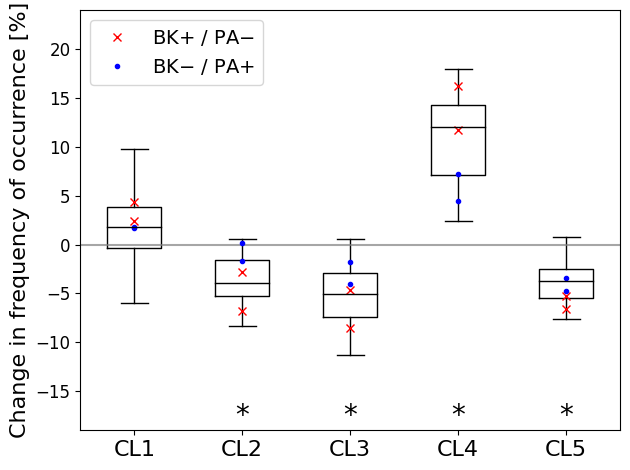

In [12]:
import scipy.stats as stats
seas="mjjaso"
aufgabe="projected"
t_stat, p_value_1 = stats.ttest_ind(Arctic_historical["freq.3"][1:]-np.mean(Arctic_historical["freq.3"][1:]),Arctic_future["freq.3"][1:]-Arctic_historical["freq.3"][1:], equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(Arctic_historical["freq.1"][1:]-np.mean(Arctic_historical["freq.1"][1:]),Arctic_future["freq.1"][1:]-Arctic_historical["freq.1"][1:], equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(Arctic_historical["freq.2"][1:]-np.mean(Arctic_historical["freq.2"][1:]),Arctic_future["freq.2"][1:]-Arctic_historical["freq.2"][1:], equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(Arctic_historical["freq.5"][1:]-np.mean(Arctic_historical["freq.5"][1:]),Arctic_future["freq.5"][1:]-Arctic_historical["freq.5"][1:], equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(Arctic_historical["freq.4"][1:]-np.mean(Arctic_historical["freq.4"][1:]),Arctic_future["freq.4"][1:]-Arctic_historical["freq.4"][1:], equal_var=False)
#t_stat, p_value_6 = stats.ttest_ind(Arctic_historical["freq.4"][1:]-np.mean(Arctic_historical["freq.4"][1:]),Arctic_future["freq.4"][1:]-Arctic_historical["freq.4"][1:], equal_var=False)
# t_stat, p_value_7 = stats.ttest_ind(hist_cl7-np.mean(hist_cl7),np.array(table_difference_cl7['all'][:-1]), equal_var=False)
# t_stat, p_value_8 = stats.ttest_ind(hist_cl8-np.mean(hist_cl8),np.array(table_difference_cl8['all'][:-1]), equal_var=False)
# t_stat, p_value_9 = stats.ttest_ind(hist_cl9-np.mean(hist_cl9),np.array(table_difference_cl9['all'][:-1]), equal_var=False)
values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])#,p_value_7,p_value_8,p_value_9])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)
mylabels= ["CL1","CL2","CL3","CL4","CL5"]
region="arc"
scenario="ssp5_"  
bp=plt.boxplot(x=[Arctic_future["freq.3"][1:]-Arctic_historical["freq.3"][1:],Arctic_future["freq.1"][1:]-Arctic_historical["freq.1"][1:],Arctic_future["freq.2"][1:]-Arctic_historical["freq.2"][1:],Arctic_future["freq.5"][1:]-Arctic_historical["freq.5"][1:],Arctic_future["freq.4"][1:]-Arctic_historical["freq.4"][1:]], showfliers=False,medianprops=dict(color="k"))
plt.ylabel('Change in frequency of occurrence [%]',fontsize=16)
plt.xticks([1, 2, 3, 4, 5], mylabels, fontsize=16)

#plt.xlabel(fontsize=12)
#plt.title("Whisker plot of multi-model distribution of ACR frequencies of future reference \n periods with respect to historical regime frequency, JJA")
plt.hlines(0,0,7,color='grey', alpha=0.7)
#plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.xlim(0.5,5.5)
plt.ylim(-19,24)

#plt.


try:
    plt.text(smaller_indices[0]+1, -17.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, -17.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, -17.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, -17.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
     plt.text(smaller_indices[4]+1, -17.5, "*", ha='center', va='center', fontsize=20)#
except:
     pass
# 'try:
#      plt.text(smaller_indices[5]+1, -17.5, "*", ha='center', va='center', fontsize=20)
# except:
#      pass'
# try:
#     plt.text(smaller_indices[6]+1, -17.5, "°", ha='center', va='center', fontsize=20)
# except:
#     pass
# try:
#     plt.text(smaller_indices[7]+1, -17.5, "°", ha='center', va='center', fontsize=20)#
# except:
#     pass
# try:
#     plt.text(smaller_indices[8]+1, -17.5, "°", ha='center', va='center', fontsize=20)
# except:
#     pass
plt.tight_layout()


plt.plot(1.,4.4,"rx", label="BK+ / PA$-$")#CNRM
plt.plot(1,2.4,"rx")
#plt.plot(1,-2.5,"rx")
plt.plot(1,1.8,"b.", label="BK$-$ / PA+")#KACE
plt.plot(1,1.7,"b.")#NOR
#plt.plot(1,2.3,"g*", label="Weak")#MIROC
#plt.plot(1,-4.8,"c+")

plt.plot(2.,-6.8,"rx")#CNRM
plt.plot(2,-2.8,"rx")
#plt.plot(3,10.5,"rx")
plt.plot(2,-1.7,"b.")#KACE
plt.plot(2,0.2,"b.")#NOR
#plt.plot(3,3.1,"g*")#MIROC

plt.plot(3.,-8.5,"rx")#CNRM
plt.plot(3,-4.6,"rx")
#plt.plot(2,-3.1,"rx")
plt.plot(3,-4.0,"b.")#KACE
plt.plot(3,-1.8,"b.")#NOR
#plt.plot(2,-3.5,"g*")#MIROC


plt.plot(4.,16.2,"rx")#CNRM
plt.plot(4,11.7,"rx")
#plt.plot(4,1.1,"rx")
plt.plot(4,7.2,"b.")#KACE
plt.plot(4,4.5,"b.")#NOR
#plt.plot(4,3.4,"g*")#MIROC


plt.plot(5.,-5.3,"rx")#CNRM
plt.plot(5,-6.6,"rx")
#plt.plot5,-2.7,"rx")
plt.plot(5,-3.4,"b.")#KACE
plt.plot(5,-4.7,"b.")#NOR
#plt.plot(5,-2.0,"g*")#MIROCOC
#plt.plot(5,8.4,"c+")

# plt.plot(6.,-6.8,"rx")#CNRM
# plt.plot(6,-3.4,"rx")
# plt.plot(6,-3.3,"b.")#KACE
# plt.plot(6,-2.2,"b.")#NOR
#plt.plot(5,5.3,"c+")#MIROC
#plt.plot(5,8.4,"c+")
plt.legend(fontsize=14)
plt.savefig("N:/atm_glomod/user/jomuel001/Dokumente/Paper/OSkar/SAN_MJJASO_whiskerplot_"+scenario+seas+"_"+region+"_"+aufgabe+"5cluster.png",dpi=300)

[1, 2, 3, 4]


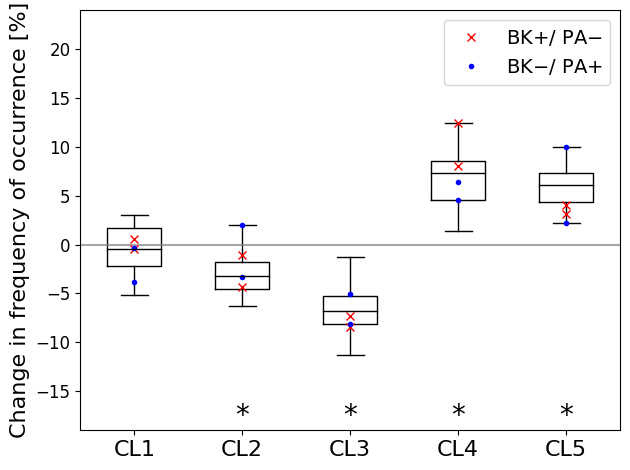

In [23]:
import scipy.stats as stats

t_stat, p_value_1 = stats.ttest_ind(hist_cl1-np.mean(hist_cl1),np.array(table_difference_cl1['all'][:-1]), equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(hist_cl2-np.mean(hist_cl2),np.array(table_difference_cl2['all'][:-1]), equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(hist_cl3-np.mean(hist_cl3),np.array(table_difference_cl3['all'][:-1]), equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(hist_cl4-np.mean(hist_cl4),np.array(table_difference_cl4['all'][:-1]), equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(hist_cl5-np.mean(hist_cl5),np.array(table_difference_cl5['all'][:-1]), equal_var=False)
#t_stat, p_value_6 = stats.ttest_ind(hist_cl6-np.mean(hist_cl6),np.array(table_difference_cl6['all'][:-1]), equal_var=False)
# t_stat, p_value_7 = stats.ttest_ind(hist_cl7-np.mean(hist_cl7),np.array(table_difference_cl7['all'][:-1]), equal_var=False)
# t_stat, p_value_8 = stats.ttest_ind(hist_cl8-np.mean(hist_cl8),np.array(table_difference_cl8['all'][:-1]), equal_var=False)
# t_stat, p_value_9 = stats.ttest_ind(hist_cl9-np.mean(hist_cl9),np.array(table_difference_cl9['all'][:-1]), equal_var=False)
values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])#,p_value_6])#,p_value_7,p_value_8,p_value_9])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)
mylabels= ["CL1","CL2","CL3","CL4","CL5"]
    
scenario="ssp5_"  
bp=plt.boxplot(x=[np.array(table_difference_cl1['all'][:-1]),np.array(table_difference_cl2['all'][:-1]),np.array(table_difference_cl3['all'][:-1]),np.array(table_difference_cl4['all'][:-1]),np.array(table_difference_cl5['all'][:-1])], showfliers=False,medianprops=dict(color="k"))
plt.ylabel('Change in frequency of occurrence [%]',fontsize=16)
plt.xticks([1, 2, 3, 4, 5], mylabels, fontsize=16)

#plt.xlabel(fontsize=12)
#plt.title("Whisker plot of multi-model distribution of ACR frequencies of future reference \n periods with respect to historical regime frequency, JJA")
plt.hlines(0,0,7,color='grey', alpha=0.7)
#plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.xlim(0.5,5.5)
plt.ylim(-19,24)

#plt.


try:
    plt.text(smaller_indices[0]+1, -17.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, -17.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, -17.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, -17.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
     plt.text(smaller_indices[4]+1, -17.5, "*", ha='center', va='center', fontsize=20)#
except:
     pass
# try:
#     plt.text(smaller_indices[5]+1, -17.5, "*", ha='center', va='center', fontsize=20)
# except:
#     pass
# try:
#     plt.text(smaller_indices[6]+1, -17.5, "°", ha='center', va='center', fontsize=20)
# except:
#     pass
# try:
#     plt.text(smaller_indices[7]+1, -17.5, "°", ha='center', va='center', fontsize=20)#
# except:
#     pass
# try:
#     plt.text(smaller_indices[8]+1, -17.5, "°", ha='center', va='center', fontsize=20)
# except:
#     pass
plt.tight_layout()

#ATL CLUSTER 5 SSP5
plt.plot(1.,-0.5,"rx", label="BK+/ PA$-$")#CNRM
plt.plot(1,0.6,"rx")
plt.plot(1,-3.8,"b.", label="BK$-$/ PA+")#KACE
plt.plot(1,-0.4,"b.")#NOR
#plt.plot(1,-4.6,"c+", label="BK+/ PA+")#MIROC
#plt.plot(1,-4.8,"c+")

plt.plot(2.,-4.3,"rx")#CNRM
plt.plot(2,-1.1,"rx")
plt.plot(2,-3.3,"b.")#KACE
plt.plot(2,2.0,"b.") #NOR
#plt.plot(2,-1.4,"c+")#MIROC
#plt.plot(2,-0.7,"c+")

plt.plot(3.,-8.4,"rx")#CNRM
plt.plot(3,-7.3,"rx")
plt.plot(3,-8.1,"b.")#KACE
plt.plot(3,-5.1,"b.") #NOR
#plt.plot(3,2.1,"c+")#MIROC
#plt.plot(3,1.8,"c+")


plt.plot(4.,12.4,"rx")#CNRM
plt.plot(4,8.0,"rx")
plt.plot(4,6.4,"b.")#KACE
plt.plot(4,4.6,"b.")#NOR
#plt.plot(4,-2.2,"c+")#MIROC
#plt.plot(4,-3.4,"c+")


plt.plot(5.,4.1,"rx")#CNRM
plt.plot(5,3.1,"rx")
plt.plot(5,10.0,"b.")#KACE
plt.plot(5,2.2,"b.")#NOR
#plt.plot(5,5.3,"c+")#MIROC
#plt.plot(5,8.4,"c+")


plt.legend(fontsize=14)
plt.savefig("N:/atm_glomod/user/jomuel001/Dokumente/Paper/OSkar/KME_MJJASO_whiskerplot_"+scenario+seas+"_"+region+"_"+aufgabe+"5cluster.png",dpi=300)

In [21]:
np.array(table_difference_cl1['all'][:-1])

array([ 1.9, -0.7, -0.1, -0.5,  1.7,  0.6, -2.2, -0.5,  0.3, -0.5,  3. ,
        2.5, -3.8, -2.3, -5.2,  1.9,  1.8, -3.1, -0.4, -3.1])

# historical data for welchs t test

In [14]:
hist_cl1=np.array(table_historisch_cl1['all'][:-1])
hist_cl2=np.array(table_historisch_cl2['all'][:-1])
hist_cl3=np.array(table_historisch_cl3['all'][:-1])
hist_cl4=np.array(table_historisch_cl4['all'][:-1])
hist_cl5=np.array(table_historisch_cl5['all'][:-1])
#hist_cl6=np.array(table_historisch_cl6['all'][:-1])
# hist_cl7=np.array(table_historisch_cl7['all'][:-1])
# hist_cl8=np.array(table_historisch_cl8['all'][:-1])
# hist_cl9=np.array(table_historisch_cl9['all'][:-1])

In [15]:
ssp5_cl1=np.array(table_difference_cl1['all'][:-1])
ssp5_cl2=np.array(table_difference_cl2['all'][:-1])
ssp5_cl3=np.array(table_difference_cl3['all'][:-1])
ssp5_cl4=np.array(table_difference_cl4['all'][:-1])
ssp5_cl5=np.array(table_difference_cl5['all'][:-1])
#ssp5_cl6=np.array(table_difference_cl6['all'][:-1])
# ssp5_cl7=np.array(table_difference_cl7['all'][:-1])
# ssp5_cl8=np.array(table_difference_cl8['all'][:-1])
# ssp5_cl9=np.array(table_difference_cl9['all'][:-1])

In [19]:
ssp5_cl2

array([-5.2, -4.5,  1.2, -4.3, -4.5, -1.1,  0.8, -1. , -9.1, -6.3, -2. ,
       -5.4, -3.3, -2.4, -3.1, -3.2, -3.1, -4.1,  2. , -4.2])

In [ ]:
#ARCTIC 6 clister KME
plt.plot(1.,0.65,"rx", label="BK+ / PA$-$")#CNRM
plt.plot(1,0.75,"rx")
#plt.plot(1,-2.5,"rx")
plt.plot(1,-2.4,"b.", label="BK$-$ / PA+")#KACE
plt.plot(1,-0.4,"b.")#NOR
#plt.plot(1,2.3,"g*", label="Weak")#MIROC
#plt.plot(1,-4.8,"c+")

plt.plot(2.,-2.6,"rx")#CNRM
plt.plot(2,-5.8,"rx")
#plt.plot(2,-3.1,"rx")
plt.plot(2,-1.5,"b.")#KACE
plt.plot(2,2.0,"b.")#NOR
#plt.plot(2,-3.5,"g*")#MIROC

plt.plot(3.,12.7,"rx")#CNRM
plt.plot(3,7.7,"rx")
#plt.plot(3,10.5,"rx")
plt.plot(3,5.9,"b.")#KACE
plt.plot(3,3.7,"b.")#NOR
#plt.plot(3,3.1,"g*")#MIROC


plt.plot(4.,-7.0,"rx")#CNRM
plt.plot(4,-5.4,"rx")
#plt.plot(4,1.1,"rx")
plt.plot(4,-7.5,"b.")#KACE
plt.plot(4,-4.2,"b.")#NOR
#plt.plot(4,3.4,"g*")#MIROC


plt.plot(5.,3.0,"rx")#CNRM
plt.plot(5,2.1,"rx")
#plt.plot(5,-2.7,"rx")
plt.plot(5,8.7,"b.")#KACE
plt.plot(5,1.3,"b.")#NOR
#plt.plot(5,-2.0,"g*")#MIROCOC
#plt.plot(5,8.4,"c+")

plt.plot(6.,-0.2,"rx")#CNRM
plt.plot(6,0.9,"rx")
plt.plot(6,-2.0,"b.")#KACE
plt.plot(6,0.9,"b.")#NOR
#plt.plot(5,5.3,"c+")#MIROC
#plt.plot(5,8.4,"c+")

In [10]:
ssp3_scan=np.array(table_difference_cl1['all'][:-1])
ssp3_atl=np.array(table_difference_cl2['all'][:-1])
ssp3_naoplus=np.array(table_difference_cl3['all'][:-1])
ssp3_naominus=np.array(table_difference_cl4['all'][:-1])
ssp3_dipol=np.array(table_difference_cl5['all'][:-1])

In [8]:
ssp2_scan=np.array(table_difference_cl1['all'][:-1])
ssp2_atl=np.array(table_difference_cl2['all'][:-1])
ssp2_naoplus=np.array(table_difference_cl3['all'][:-1])
ssp2_naominus=np.array(table_difference_cl4['all'][:-1])
ssp2_dipol=np.array(table_difference_cl5['all'][:-1])

In [6]:
ssp1_scan=np.array(table_difference_cl1['all'][:-1])
ssp1_atl=np.array(table_difference_cl2['all'][:-1])
ssp1_naoplus=np.array(table_difference_cl3['all'][:-1])
ssp1_naominus=np.array(table_difference_cl4['all'][:-1])
ssp1_dipol=np.array(table_difference_cl5['all'][:-1])

In [11]:
if scenario=="ssp2_":
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G", "MIROC6","MIROC-ES2L", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0","NESM3","NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]
    
elif scenario=="":
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G", "MIROC6", "MIROC-ES2L", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NESM3", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="ssp1_":
    models=["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp1
          "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "KACE-1-0-G", "MIROC6",
            "MIROC-ES2L", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NESM3", "NorESM2-LM","NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="ssp3_":
    models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1",  #ssp3
          "GFDL-ESM4", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G","MIROC-ES2L", "MIROC6",  "MPI-ESM1-2-LR", "MRI-ESM2-0","NorESM2-LM", "UKESM1-0-LL"]
elif scenario=="hist":
    models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G","MIROC-ES2L", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0","NESM3", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]

[4]


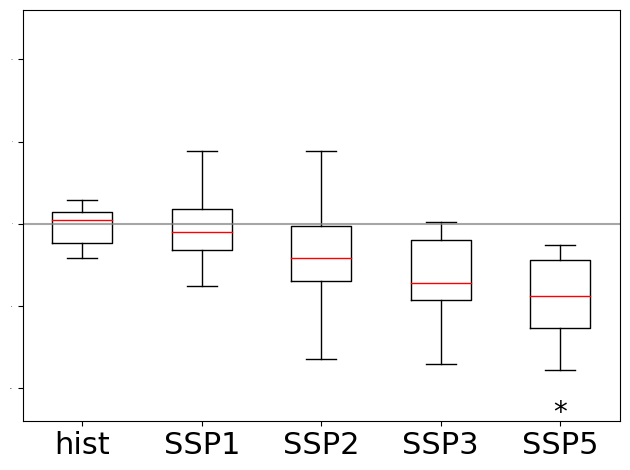

In [13]:
import scipy.stats as stats
t_stat, p_value_1 = stats.ttest_ind(hist_naominus-np.mean(hist_naominus),hist_naominus-np.mean(hist_naominus), equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(hist_naominus-np.mean(hist_naominus),ssp1_naominus, equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(hist_naominus-np.mean(hist_naominus),ssp2_naominus, equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(hist_naominus-np.mean(hist_naominus),ssp3_naominus, equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(hist_naominus-np.mean(hist_naominus),ssp5_naominus, equal_var=False)
values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)

scenario="Vergleich"  
bp=plt.boxplot(x=[hist_naominus-np.mean(hist_naominus)-0.1,ssp1_naominus,ssp2_naominus,ssp3_naominus,ssp5_naominus], labels=["hist","SSP1","SSP2","SSP3","SSP5"], showfliers=False,medianprops=dict(color="r"))

plt.hlines(0,0,6,color='grey', alpha=0.7)
plt.xticks(fontsize=22)
plt.yticks(fontsize=0)
plt.xlim(0.5,5.5)
plt.ylim(-12,13)
try:
    plt.text(smaller_indices[0]+1, -11.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, -11.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, -11.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, -11.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[4]+1, -11.5, "*", ha='center', va='center', fontsize=20)#
except:
    pass
plt.tight_layout()
plt.savefig("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/naominus_"+scenario+seas+"_"+region+"_"+aufgabe+".png",dpi=300)

[1, 2, 3, 4]


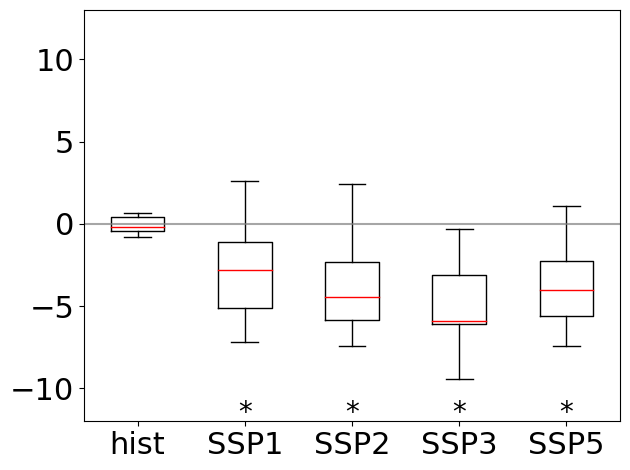

[4]


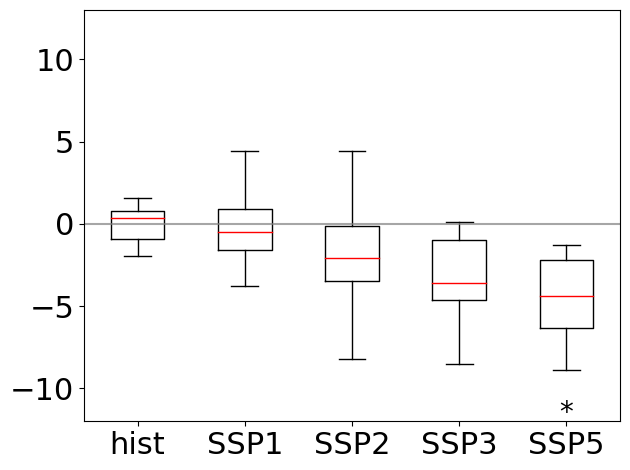

[3, 4]


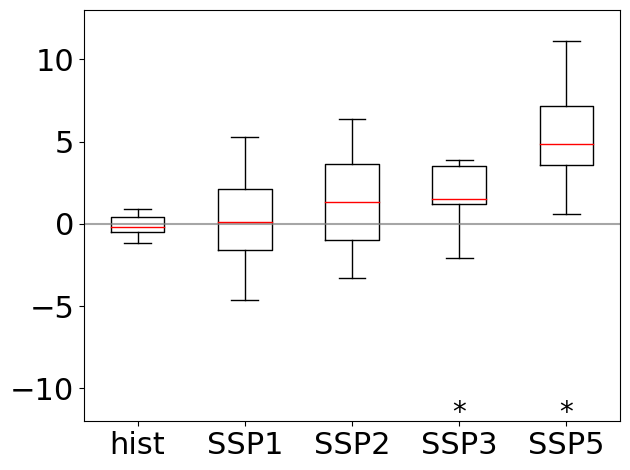

[4]


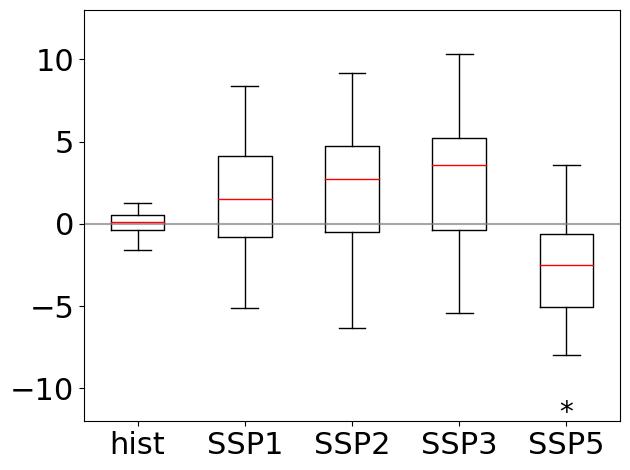

[1, 2, 3, 4]


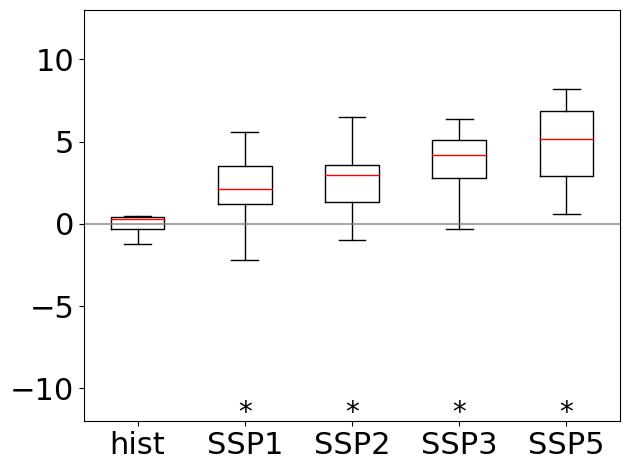

In [17]:
import scipy.stats as stats

# Define lists of variable affixes
affixes = ["scan","naominus", "naoplus", "atl","dipol"]

# Create an empty list to store p-values
p_values = []

# Loop through the variable and affix combinations and perform t-tests
for affix in affixes:
        # Assuming you have these variables defined somewhere
        variable_name_ = f"hist_{affix}"
        variable1_name_ = f"ssp1_{affix}"
        variable2_name_ = f"ssp2_{affix}"
        variable3_name_ = f"ssp3_{affix}"
        variable5_name_ = f"ssp5_{affix}"
        variable_name = globals()[variable_name_]
        variable1_name = globals()[variable1_name_]
        variable2_name = globals()[variable2_name_]
        variable3_name = globals()[variable3_name_]
        variable5_name = globals()[variable5_name_]
        
        t_stat, p_value_1 = stats.ttest_ind(variable_name-np.mean(variable_name),variable_name-variable_name, equal_var=False)
        t_stat, p_value_2 = stats.ttest_ind(variable_name-np.mean(variable_name),variable1_name, equal_var=False)
        t_stat, p_value_3 = stats.ttest_ind(variable_name-np.mean(variable_name),variable2_name, equal_var=False)
        t_stat, p_value_4 = stats.ttest_ind(variable_name-np.mean(variable_name),variable3_name, equal_var=False)
        t_stat, p_value_5 = stats.ttest_ind(variable_name-np.mean(variable_name),variable5_name, equal_var=False)
        values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
        threshold=0.01
        smaller_indices = [index for index, value in enumerate(values) if value < threshold]
        print(smaller_indices)

        scenario="Vergleich"  
        bp=plt.boxplot(x=[variable_name-np.mean(variable_name),variable1_name,variable2_name,variable3_name,variable5_name], labels=["hist","SSP1","SSP2","SSP3","SSP5"], showfliers=False,medianprops=dict(color="r"))

        plt.hlines(0,0,6,color='grey', alpha=0.7)
        plt.xticks(fontsize=22)
        plt.yticks(fontsize=22)
        plt.xlim(0.5,5.5)
        plt.ylim(-12,13)
        try:
            plt.text(smaller_indices[0]+1, -11.5, "*", ha='center', va='center', fontsize=20)
        except:
            pass
        try:
            plt.text(smaller_indices[1]+1, -11.5, "*", ha='center', va='center', fontsize=20)
        except:
            pass
        try:
            plt.text(smaller_indices[2]+1, -11.5, "*", ha='center', va='center', fontsize=20)
        except:
            pass
        try:
            plt.text(smaller_indices[3]+1, -11.5, "*", ha='center', va='center', fontsize=20)
        except:
            pass
        try:
            plt.text(smaller_indices[4]+1, -11.5, "*", ha='center', va='center', fontsize=20)#
        except:
            pass
        plt.tight_layout()
        plt.savefig(f"N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/{affix}_POLARRES_"+scenario+seas+"_"+region+"_"+aufgabe+".png",dpi=300)
        plt.show()

In [24]:
variable_name

'hist_scan'

In [6]:
scenario=""

if scenario=="ssp2_":
    sce_model="MULTIMODEL-SSP2"
    #scan 1, atl 2, n+ 3, n- 4 dip 5 #hier reihenfolge von ERA5 hist im moment wegen projected patterns
    zuordnungcluster=[0,1,5,2,4,3]
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
    dates=[5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520]
elif scenario=="":
    sce_model="MULTIMODEL-SSP5"
    zuordnungcluster=[0,1,2,5,4,3]
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
    dates=[5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520]
elif scenario=="ssp1_":
    sce_model="MULTIMODEL-SSP1"
    zuordnungcluster=[0,1,2,5,4,3]
    models=["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp1
          "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
    dates=[5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520]
elif scenario=="ssp3_":
    sce_model="MULTIMODEL-SSP3"
    zuordnungcluster=[0,1,2,5,4,3]
    models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1",  #ssp3
          "GFDL-ESM4", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6",  "MPI-ESM1-2-LR", "MRI-ESM2-0", "UKESM1-0-LL"]
    dates=[5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520]
else:
    print("wählen scenario aus")
sce_model_hist="MULTIMODEL-hist"
zuordnungcluster_hist=[0,1,2,5,4,3]
models_hist =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", 
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
dates_hist=[5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520]
seas="mjjaso"
months=6
cluster = 5
months_name=[5,6,7,8,9,10]
month_len=[31,30,31,31,30,31]
months_official=["May","June","July","August","September","October"]
days_per_year=sum(month_len)
years=30
days_per_period=days_per_year*years
years_hist="1985-2014"
years_proj="1985-2014"
years_fut="2070-2099"
area="-90_90"
region="atl"
if region=="paz":
    cl1={}
    cl2={}
    cl3={}
    cl4={}
    cl5={}
else:
    scan={}
    atl={}
    naoplus={}
    naominus={}
    dipol={}
counts_hist = {}
counts_fut = {}
occurence_hist = {}
occurence_fut={}
difference_cl1={}
difference_cl2={}
difference_cl3={}
difference_cl4={}
difference_cl5={}

for model in range(len(models)):
        model_hist=model
        path_fut="N:/atm_glomod/user/jomuel001/CMIP6_models/"+sce_model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/"
        path_2="N:/atm_glomod/user/jomuel001/CMIP6_models/"+"MULTIMODEL-hist"+"/AREA."+area+"_89.7849_29.0866/CLUSTER/"
        path="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/"
        #cluster werden zu era5 zugeordnet
        datei_occ_hist=r"KMEANSslp_hpa_"+""+"MULTIMODEL-hist"+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"
        datei_occ_fut=r"KMEANSslp_hpa_"+scenario+sce_model+"_"+years_fut+".N_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"
        print(datei_occ_fut)
        while models[model] != models_hist[model_hist]:
            model_hist=model_hist+1
        occurence_hist['all']=np.loadtxt(path_2+datei_occ_hist, delimiter=' ')[sum(dates_hist[:model_hist]):sum(dates_hist[:(model_hist+1)]),:]
        occurence_fut['all']=np.loadtxt(path_fut+datei_occ_fut, delimiter=' ')[sum(dates[:model]):sum(dates[:(model+1)]),:]

        for i in range(len(occurence_fut['all'][:,3])):
            if occurence_fut['all'][i,3] == 1:
                occurence_fut['all'][i,3] = zuordnungcluster[1]
            elif occurence_fut['all'][i,3] == 2:
                occurence_fut['all'][i,3] = zuordnungcluster[2]
            elif occurence_fut['all'][i,3] == 3:
                occurence_fut['all'][i,3] = zuordnungcluster[3]
            elif occurence_fut['all'][i,3] == 4:
                occurence_fut['all'][i,3] = zuordnungcluster[4]
            elif occurence_fut['all'][i,3] == 5:
                occurence_fut['all'][i,3] = zuordnungcluster[5]
                
        for i in range(len(occurence_hist['all'][:,3])):
            if occurence_hist['all'][i,3] == 1:
                occurence_hist['all'][i,3] = zuordnungcluster_hist[1]
            elif occurence_hist['all'][i,3] == 2:
                occurence_hist['all'][i,3] = zuordnungcluster_hist[2]
            elif occurence_hist['all'][i,3] == 3:
                occurence_hist['all'][i,3] = zuordnungcluster_hist[3]
            elif occurence_hist['all'][i,3] == 4:
                occurence_hist['all'][i,3] = zuordnungcluster_hist[4]
            elif occurence_hist['all'][i,3] == 5:
                occurence_hist['all'][i,3] = zuordnungcluster_hist[5]
       # print(occurence_hist['all'])
       # print(occurence_fut['all'])
        counts_hist['all']=np.bincount(np.round(occurence_hist['all'][:,3]).astype(int))/(days_per_period)
        counts_fut['all']=np.bincount(np.round(occurence_fut['all'][:,3]).astype(int))/(days_per_period)
        #print(counts_hist['all'])
        #print(counts_fut['all'])
        print(model)
        for month in range(0,months):
            occurence_hist[str(months_official[month])]=np.array([])
            occurence_fut[str(months_official[month])]=np.array([])
            for entry in range(len(occurence_hist['all'])):
                if occurence_hist['all'][entry,1]==months_name[month]:
                    occurence_hist[str(months_official[month])]=np.append(occurence_hist[str(months_official[month])],(occurence_hist['all'][entry,:]))
                    occurence_fut[str(months_official[month])]=np.append(occurence_fut[str(months_official[month])],(occurence_fut['all'][entry,:]))
            occurence_hist[str(months_official[month])]= np.reshape(occurence_hist[str(months_official[month])], (int(len(occurence_hist[str(months_official[month])])/6),6))
            occurence_fut[str(months_official[month])]= np.reshape(occurence_fut[str(months_official[month])], (int(len(occurence_fut[str(months_official[month])])/6),6))
            #print(occurence_hist['May'])
            #print(occurence_fut['May'])
            counts_hist[str(months_official[month])]=np.bincount(np.round(occurence_hist[str(months_official[month])][:,3]).astype(int))/(years*month_len[month])
            counts_fut[str(months_official[month])]=np.bincount(np.round(occurence_fut[str(months_official[month])][:,3]).astype(int))/(years*month_len[month]) #bei zweimodellen gibt es 120 0zuweisungen
            #print(years*month_len[month])
            #print(counts_hist['May'])
            #print(counts_fut['May'])
            if counts_hist[str(months_official[month])][0]>0:
                print(models[model]+" da sind 120 falschzuweisungen")
        for month in range(0,months):
            if model==0:
                difference_cl1[str(months_official[month])]=np.array([])
                difference_cl2[str(months_official[month])]=np.array([])
                difference_cl3[str(months_official[month])]=np.array([])
                difference_cl4[str(months_official[month])]=np.array([])
                difference_cl5[str(months_official[month])]=np.array([])
            else:
                pass
            difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],counts_fut[str(months_official[month])][1]-counts_hist[str(months_official[month])][1])
            difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],counts_fut[str(months_official[month])][2]-counts_hist[str(months_official[month])][2])
            difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],counts_fut[str(months_official[month])][3]-counts_hist[str(months_official[month])][3])
            difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],counts_fut[str(months_official[month])][4]-counts_hist[str(months_official[month])][4])
            difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],counts_fut[str(months_official[month])][5]-counts_hist[str(months_official[month])][5])
        if model==0:
            difference_cl1['all']=np.array([])
            difference_cl2['all']=np.array([])
            difference_cl3['all']=np.array([])
            difference_cl4['all']=np.array([])
            difference_cl5['all']=np.array([])
        else:
            pass
        #print(counts_hist['all'])
        #print(counts_fut['all'])
        #print(counts_hist['June'])
        #print(counts_fut['June'])
        difference_cl1['all']=np.append(difference_cl1['all'],float(f"{counts_fut['all'][1]-counts_hist['all'][1]:.2f}"))
        #print(difference_cl1['all'])
        difference_cl2['all']=np.append(difference_cl2['all'],float(f"{counts_fut['all'][2]-counts_hist['all'][2]:.2f}"))
        difference_cl3['all']=np.append(difference_cl3['all'],float(f"{counts_fut['all'][3]-counts_hist['all'][3]:.2f}"))
        difference_cl4['all']=np.append(difference_cl4['all'],float(f"{counts_fut['all'][4]-counts_hist['all'][4]:.2f}"))
        difference_cl5['all']=np.append(difference_cl5['all'],float(f"{counts_fut['all'][5]-counts_hist['all'][5]:.2f}"))
        #significance: spalten sind die cl, zeilen die monate, alles in 6x5 arrays
        #minmax: zuerst 5 cl dann nächster monat dann 5 cl dann nächster monat von cl1 nach cl5, alles in 6x5 arrays
        table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+1]).transpose()
        #hier durchschnittbilden
 
        if model==len(models)-1:
            difference_cl1['all']=np.append(difference_cl1['all'], np.mean(difference_cl1['all']))
            difference_cl2['all']=np.append(difference_cl2['all'], np.mean(difference_cl2['all']))
            difference_cl3['all']=np.append(difference_cl3['all'], np.mean(difference_cl3['all']))
            difference_cl4['all']=np.append(difference_cl4['all'], np.mean(difference_cl4['all']))
         #   difference_cl5['all']=np.append(difference_cl5['all'], np.mean(difference_cl5['all']))                           
            for month in range(0,months):
                difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],np.mean(difference_cl1[str(months_official[month])]))
                difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],np.mean(difference_cl2[str(months_official[month])]))
                difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],np.mean(difference_cl3[str(months_official[month])]))
                difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],np.mean(difference_cl4[str(months_official[month])]))
                difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],np.mean(difference_cl5[str(months_official[month])]))
            models.append('add')
            table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+2]).transpose().round(2)  

        #durchschnitt bilden vorbeistyler.format('{:.2f}')
        #jetzt die farben
       #for month in range(0,months): 
        #    styled_df = df.style.applymap(lambda x: significance_decider(x, significance[month,]))

            # render the styled dataframe as HTML with CSS formatting
        print(table_difference_cl1)
        print(table_difference_cl2)
        print(table_difference_cl3)
        print(table_difference_cl4)
        print(table_difference_cl5)


KMEANSslp_hpa_MULTIMODEL-SSP5_2070-2099.N_mjjaso_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA51985-2014slp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates
0
                 May      June      July   August  September   October   all
ACCESS-CM2  0.011828  0.026667  0.037634  0.02043  -0.011111 -0.008602  0.01
                 May      June      July    August  September   October   all
ACCESS-CM2  0.037634  0.022222  0.011828  0.003226  -0.016667  0.006452  0.01
                 May      June      July    August  September   October   all
ACCESS-CM2 -0.012903 -0.027778 -0.003226 -0.005376   0.022222 -0.009677 -0.01
                 May      June      July    August  September  October  all
ACCESS-CM2 -0.012903 -0.004444 -0.017204 -0.021505   0.015556  0.01828 -0.0
                 May      June      July    August  September   October   all
ACCESS-CM2 -0.023656 -0.016667 -0.029032  0.003226      -0.01 -0.006452 -0.01
KMEANSslp_hpa_MULTIMODEL-SSP5_2070-209

5
                    May      June      July    August  September   October  \
ACCESS-CM2     0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1   -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM   -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1    -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1    0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   

                all  
ACCESS-CM2     0.01  
ACCESS-ESM1   -0.03  
CESM2-WACCM   -0.01  
CNRM-CM6-1    -0.02  
CNRM-CM6-1-HR -0.02  
CNRM-ESM2-1    0.02  
                    May      June      July    August  September   October  \
ACCESS-CM2     0.037634  0.022222  0.011828  0.003226  -0.016667  0.006452   
ACCESS-ESM1    0.045161  0.015556 -0.012903  0.005376   0.050000  0.008602   
CESM2-WACCM    0.034409  0.033333 -0.009677  0.027957   0.02888

8
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   

                  all  
ACCESS-CM2       0.01  
ACCESS-ESM1     -0.03  
CESM2-WACCM     -0.01  
CNRM-CM6-1      -0.02  
CNRM-CM6-1-HR   -0.02  
CNRM-ESM2-1      0.02  
GFDL-CM4         0.01  
GFDL-

10
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   
INM-CM4-8       -0.019355  0.035556 -0.015054  0.017204   0.034444  0.022581   
INM-CM5-0        0.016129  0.018889  0.004301  0.011828   0.003333  0.013978   

                  all  
ACCESS-CM2  

12
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   
INM-CM4-8       -0.019355  0.035556 -0.015054  0.017204   0.034444  0.022581   
INM-CM5-0        0.016129  0.018889  0.004301  0.011828   0.003333  0.013978   
IPSL-CM6A-LR     0.065591  0.018889  

14
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   
INM-CM4-8       -0.019355  0.035556 -0.015054  0.017204   0.034444  0.022581   
INM-CM5-0        0.016129  0.018889  0.004301  0.011828   0.003333  0.013978   
IPSL-CM6A-LR     0.065591  0.018889  

15
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   
INM-CM4-8       -0.019355  0.035556 -0.015054  0.017204   0.034444  0.022581   
INM-CM5-0        0.016129  0.018889  0.004301  0.011828   0.003333  0.013978   
IPSL-CM6A-LR     0.065591  0.018889  

16
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   
INM-CM4-8       -0.019355  0.035556 -0.015054  0.017204   0.034444  0.022581   
INM-CM5-0        0.016129  0.018889  0.004301  0.011828   0.003333  0.013978   
IPSL-CM6A-LR     0.065591  0.018889  

17
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
                  May  June  July  August  September  October   all
ACCESS-CM2       0.01  0.03  0.04    0.02      -0.01    -0.01  0.01
ACCESS-ESM1     -0.02 -0.03 -0.03   -0.05      -0.04    -0.00 -0.03
CESM2-WACCM     -0.01 -0.02  0.01   -0.01      -0.00    -0.01 -0.01
CNRM-CM6-1      -0.03 -0.04  0.01    0.01      -0.02    -0.02 -0.02
CNRM-CM6-1-HR   -0.02 -0.05 -0.04    0.00       0.00    -0.01 -0.02
CNRM-ESM2-1      0.01 -0.03  0.03    0.04       0.05     0.02  0.02
GFDL-CM4         0.01  0.01  0.02    0.00      -0.00     0.02  0.01
GFDL-ESM4        0.02 -0.02  0.01    0.05       0.03     0.03  0.02
HadGEM3-GC31-LL  0.01 -0.00  0.02   -0.00      -0.02    -0.04 -0.01
INM-CM4-8       -0.02  0.04 -0.02    0.02       0.03     0.02  0.

[]


NameError: name 'aufgabe' is not defined

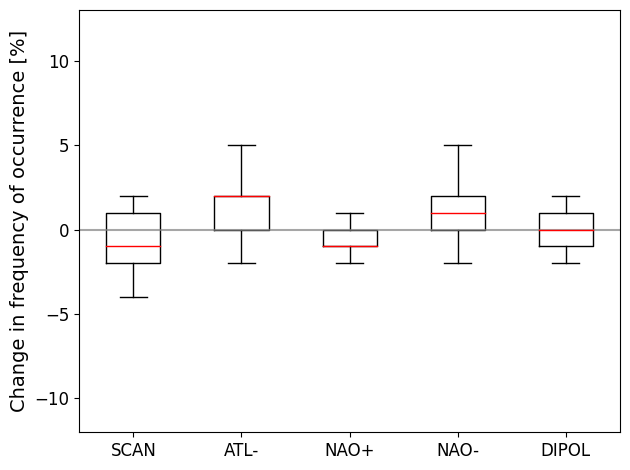

In [8]:
import scipy.stats as stats
t_stat, p_value_1 = stats.ttest_ind(np.zeros((len(models))),100*np.array(table_difference_cl1['all'][:-1]), equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(np.zeros((len(models))),100*np.array(table_difference_cl2['all'][:-1]), equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(np.zeros((len(models))),100*np.array(table_difference_cl3['all'][:-1]), equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(np.zeros((len(models))),100*np.array(table_difference_cl4['all'][:-1]), equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(np.zeros((len(models))),100*np.array(table_difference_cl5['all'][:-1]), equal_var=False)
values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)
    
scenario="ssp5_"  
bp=plt.boxplot(x=[100*np.array(table_difference_cl1['all'][:-1]),100*np.array(table_difference_cl2['all'][:-1]),100*np.array(table_difference_cl3['all'][:-1]),100*np.array(table_difference_cl4['all'][:-1]),100*np.array(table_difference_cl5['all'][:-1])], labels=["SCAN","ATL-","NAO+","NAO-","DIPOL"], showfliers=False,medianprops=dict(color="r"))
plt.ylabel('Change in frequency of occurrence [%]',fontsize=14)
#plt.xlabel(fontsize=12)
#plt.title("Whisker plot of multi-model distribution of ACR frequencies of future reference \n periods with respect to historical regime frequency, JJA")
plt.hlines(0,0,6,color='grey', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0.5,5.5)
plt.ylim(-12,13)
try:
    plt.text(smaller_indices[0]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[4]+1, -11.5, "°", ha='center', va='center', fontsize=20)#
except:
    pass
plt.tight_layout()
plt.savefig("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/whiskerplot_"+scenario+seas+"_"+region+"_"+aufgabe+".png",dpi=300)

In [51]:
hist_scan=100*np.array(table_difference_cl1['all'][:-1])
hist_atl=100*np.array(table_difference_cl2['all'][:-1])
hist_naoplus=100*np.array(table_difference_cl3['all'][:-1])
hist_naominus=100*np.array(table_difference_cl4['all'][:-1])
hist_dipol=100*np.array(table_difference_cl5['all'][:-1])

In [16]:
ssp5_scan=100*np.array(table_difference_cl1['all'][:-1])
ssp5_atl=100*np.array(table_difference_cl2['all'][:-1])
ssp5_naoplus=100*np.array(table_difference_cl3['all'][:-1])
ssp5_naominus=100*np.array(table_difference_cl4['all'][:-1])
ssp5_dipol=100*np.array(table_difference_cl5['all'][:-1])

In [13]:
ssp3_scan=100*np.array(table_difference_cl1['all'][:-1])
ssp3_atl=100*np.array(table_difference_cl2['all'][:-1])
ssp3_naoplus=100*np.array(table_difference_cl3['all'][:-1])
ssp3_naominus=100*np.array(table_difference_cl4['all'][:-1])
ssp3_dipol=100*np.array(table_difference_cl5['all'][:-1])

In [11]:
ssp2_scan=100*np.array(table_difference_cl1['all'][:-1])
ssp2_atl=100*np.array(table_difference_cl2['all'][:-1])
ssp2_naoplus=100*np.array(table_difference_cl3['all'][:-1])
ssp2_naominus=100*np.array(table_difference_cl4['all'][:-1])
ssp2_dipol=100*np.array(table_difference_cl5['all'][:-1])

In [24]:
ssp1_scan=100*np.array(table_difference_cl1['all'][:-1])
ssp1_atl=100*np.array(table_difference_cl2['all'][:-1])
ssp1_naoplus=100*np.array(table_difference_cl3['all'][:-1])
ssp1_naominus=100*np.array(table_difference_cl4['all'][:-1])
ssp1_dipol=100*np.array(table_difference_cl5['all'][:-1])

[3, 4]


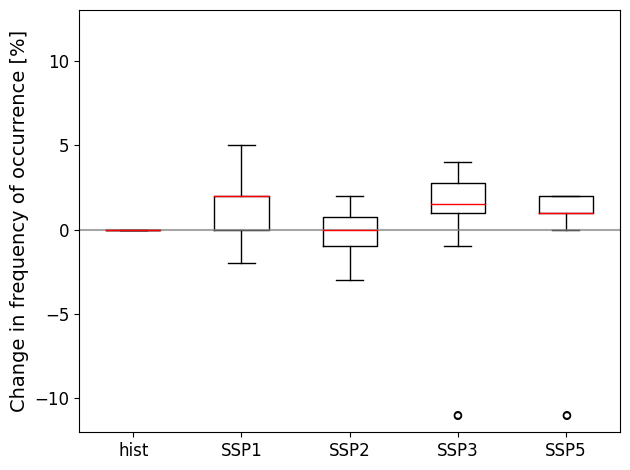

In [22]:
import scipy.stats as stats
t_stat, p_value_1 = stats.ttest_ind(np.zeros((len(models))),np.zeros(len(models)), equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(np.zeros((len(models))),ssp1_atl, equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(np.zeros((len(models))),ssp2_atl, equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(np.zeros((len(models))),ssp3_atl, equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(np.zeros((len(models))),ssp5_atl, equal_var=False)
values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)
    
scenario="Vergleich_neue_methode_"  
bp=plt.boxplot(x=[np.zeros(len(models)),ssp1_atl,ssp2_atl,ssp3_atl,ssp5_atl], labels=["hist","SSP1","SSP2","SSP3","SSP5"], showfliers=False,medianprops=dict(color="r"))
plt.ylabel('Change in frequency of occurrence [%]',fontsize=14)
#plt.xlabel(fontsize=12)
#plt.title("Whisker plot of multi-model distribution of ACR frequencies of future reference \n periods with respect to historical regime frequency, JJA")
plt.hlines(0,0,6,color='grey', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0.5,5.5)
plt.ylim(-12,13)
try:
    plt.text(smaller_indices[0]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[4]+1, -11.5, "°", ha='center', va='center', fontsize=20)#
except:
    pass
plt.tight_layout()
plt.savefig("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/atl_neueMethide_"+scenario+seas+"_"+region+".png",dpi=300)

array([[2.070e+03, 5.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00],
       [2.070e+03, 5.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00],
       [2.070e+03, 5.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00],
       ...,
       [2.099e+03, 1.000e+01, 2.900e+01, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.099e+03, 1.000e+01, 3.000e+01, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.099e+03, 1.000e+01, 3.100e+01, 0.000e+00, 0.000e+00, 0.000e+00]])

# PAZIFIK

In [15]:
ssp1_cl1=100*np.array(table_difference_cl1['all'][:-1])
ssp1_cl2=100*np.array(table_difference_cl2['all'][:-1])
ssp1_cl3=100*np.array(table_difference_cl3['all'][:-1])
ssp1_cl4=100*np.array(table_difference_cl4['all'][:-1])
ssp1_cl5=100*np.array(table_difference_cl5['all'][:-1])

In [17]:
ssp2_cl1=100*np.array(table_difference_cl1['all'][:-1])
ssp2_cl2=100*np.array(table_difference_cl2['all'][:-1])
ssp2_cl3=100*np.array(table_difference_cl3['all'][:-1])
ssp2_cl4=100*np.array(table_difference_cl4['all'][:-1])
ssp2_cl5=100*np.array(table_difference_cl5['all'][:-1])

In [19]:
ssp3_cl1=100*np.array(table_difference_cl1['all'][:-1])
ssp3_cl2=100*np.array(table_difference_cl2['all'][:-1])
ssp3_cl3=100*np.array(table_difference_cl3['all'][:-1])
ssp3_cl4=100*np.array(table_difference_cl4['all'][:-1])
ssp3_cl5=100*np.array(table_difference_cl5['all'][:-1])

In [21]:
ssp5_cl1=100*np.array(table_difference_cl1['all'][:-1])
ssp5_cl2=100*np.array(table_difference_cl2['all'][:-1])
ssp5_cl3=100*np.array(table_difference_cl3['all'][:-1])
ssp5_cl4=100*np.array(table_difference_cl4['all'][:-1])
ssp5_cl5=100*np.array(table_difference_cl5['all'][:-1])

[1, 2, 3]


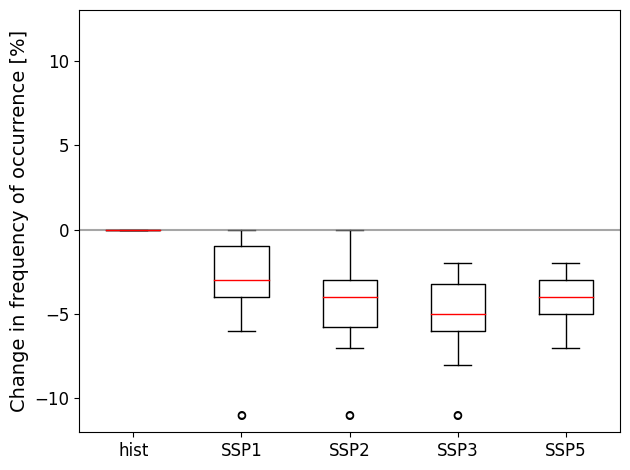

In [22]:
import scipy.stats as stats
t_stat, p_value_1 = stats.ttest_ind(np.zeros((len(models))),np.zeros((len(models))), equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(np.zeros((len(models))),ssp1_cl5, equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(np.zeros((len(models))),ssp2_cl5, equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(np.zeros((len(models))),ssp3_cl5, equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(np.zeros((len(models))),ssp5_cl5, equal_var=False)
values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)

scenario="Vergleich"  
bp=plt.boxplot(x=[np.zeros((len(models))),ssp1_cl5,ssp2_cl5,ssp3_cl5,ssp5_cl5], labels=["hist","SSP1","SSP2","SSP3","SSP5"], showfliers=False,medianprops=dict(color="r"))
plt.ylabel('Change in frequency of occurrence [%]',fontsize=14)
#plt.xlabel(fontsize=12)
#plt.title("Whisker plot of multi-model distribution of ACR frequencies of future reference \n periods with respect to historical regime frequency, JJA")
plt.hlines(0,0,6,color='grey', alpha=0.7)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0.5,5.5)
plt.ylim(-12,13)
try:
    plt.text(smaller_indices[0]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[4]+1, -11.5, "°", ha='center', va='center', fontsize=20)#
except:
    pass
plt.tight_layout()
plt.savefig("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/cl5polarres_"+scenario+seas+"_"+region+"_"+aufgabe+".png",dpi=300)

In [ ]:
#auslesen eines files



In [5]:
aufgabe="projected"
seas="mjjaso"
months=6
months_name=[5,6,7,8,9,10]
month_len=[31,30,31,31,30,31]
months_official=["May","June","July","August","September","October"]
days_per_year=sum(month_len)
years=30
days_per_period=days_per_year*years
years_hist="1985-2014"
years_proj="1985-2014"
years_fut="2070-2099"
region="arc"
if region=="arc":
    area="0_360_89.7849_59.4379"
    cluster = 6
    cl1={}
    cl2={}
    cl3={}
    cl4={}
    cl5={}
    cl6={}
    models=["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G", "MIROC6", "MIROC-ES2L",
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
else:
    area="-90_90_89.7849_29.0866"
    cluster = 5
    scan={}
    atl={}
    naoplus={}
    naominus={}
    dipol={}
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]

counts_hist = {}
counts_fut = {}
occurence_hist = {}
occurence_fut={}
difference_cl1={}
difference_cl2={}
difference_cl3={}
difference_cl4={}
difference_cl5={}
difference_cl6={}

durchschnitt=np.zeros((cluster+1,len(models)))
for model in range(len(models)):
    path_2="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"/CLUSTER/"
    path="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"/CLUSTER/PLOTS/"
    if models[model] == "ERA5":
        datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+"_"+seas+f"_atrbg_aacrm21_remapbnds_unnorm_{cluster}tabcluster_10tabPC_dates"
    elif aufgabe=="projected":
        datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+f"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_{cluster}tabcluster_10tabPC_dates"
        if region=="arc":
            datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".Nord_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+f"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_{cluster}tabcluster_10tabPC_dates"
    elif aufgabe=="simulated":
        datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+f"_atrbg_aacrm21_remapbnds_unnorm_{cluster}tabcluster_10tabPC_dates"
        if region=="arc":
            datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".Nord_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+f"_atrbg_aacrm21_remapbnds_unnorm_{cluster}tabcluster_10tabPC_dates"
    try:
        occurence_hist['all']=np.loadtxt(path_2+datei_occ_hist, delimiter=' ')
        counts_hist['all']=np.bincount(np.round(occurence_hist['all'][:,3]).astype(int))/(days_per_period)
    except: 
        continue

    print(model)
    for month in range(0,months):
        occurence_hist[str(months_official[month])]=np.array([])
        occurence_fut[str(months_official[month])]=np.array([])
        for entry in range(len(occurence_hist['all'])):
            if occurence_hist['all'][entry,1]==months_name[month]:
                occurence_hist[str(months_official[month])]=np.append(occurence_hist[str(months_official[month])],(occurence_hist['all'][entry,:]))
        occurence_hist[str(months_official[month])]= np.reshape(occurence_hist[str(months_official[month])], (int(len(occurence_hist[str(months_official[month])])/6),6))
        #print(occurence_hist['May'])
        #print(occurence_fut['May'])
        counts_hist[str(months_official[month])]=np.bincount(np.round(occurence_hist[str(months_official[month])][:,3]).astype(int))/(years*month_len[month])
    print(counts_hist['all'])
    durchschnitt[:,model]=counts_hist['all']
durschnitt=np.sum(durchschnitt,axis=1)/len(models)
print(durchschnitt)
#print(np.sum(durschnitt))
if area=="0_360_89.7849_59.4379":
    if aufgabe=="projected":
         freq_bias_proj_arc = np.array(durschnitt[1:])*100
    elif aufgabe=="simulated":
         freq_bias_sim_arc = np.array(durschnitt[1:])*100
else:
    if aufgabe=="projected":
         freq_bias_proj_atl = np.array(durschnitt[1:])*100
    elif aufgabe=="simulated":
         freq_bias_sim_atl = np.array(durschnitt[1:])*100
    

0
[0.         0.17155797 0.15833333 0.1740942  0.15289855 0.15923913
 0.15054348]
1
[0.         0.16775362 0.17481884 0.16992754 0.16286232 0.1451087
 0.14619565]
2
[0.         0.15797101 0.18152174 0.16521739 0.15452899 0.14836957
 0.15905797]
3
[0.         0.17355072 0.18152174 0.16177536 0.15054348 0.13623188
 0.16304348]
4
[0.         0.17065217 0.17644928 0.16394928 0.14275362 0.15344203
 0.15942029]
5
[0.         0.16105072 0.1740942  0.16648551 0.13605072 0.14764493
 0.18134058]
6
[0.         0.16521739 0.16503623 0.17373188 0.16721014 0.15960145
 0.13586957]
7
[0.         0.15996377 0.15543478 0.18586957 0.15887681 0.16413043
 0.1423913 ]
8
[0.         0.17065217 0.15815217 0.17518116 0.15742754 0.15108696
 0.15416667]
9
[0.         0.18333333 0.14601449 0.18605072 0.17137681 0.1615942
 0.1182971 ]
10
[0.         0.17644928 0.16231884 0.17807971 0.16304348 0.14655797
 0.14021739]
11
[0.         0.17155797 0.16702899 0.16721014 0.15851449 0.15108696
 0.15126812]
12
[0.         0

In [47]:
freq_bias_sim_atl

array([22.89150564, 20.77294686, 19.95672303, 18.69464573, 17.44263285])

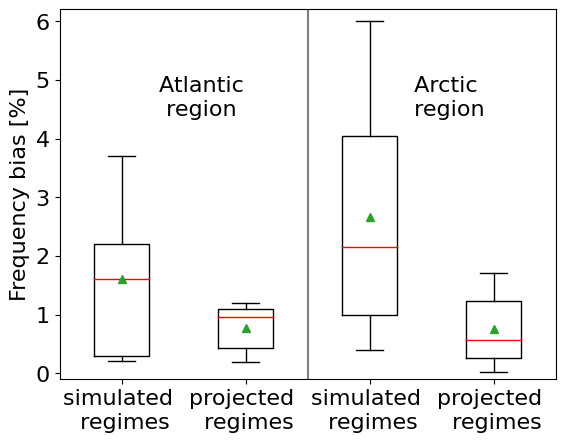

In [15]:
freq_bias_sim_arc = np.array([17.5, 11.9, 16.0, 20.9, 15.7, 18.0])
ERA5_arc =          np.array([18.5, 17.9, 17.0, 16.6, 15.3, 14.7])

freq_bias_sim_atl = np.array([23.2, 20.2, 18.2, 18.4, 20.0])
freq_bias_sim_atl_2 = np.array([23.5, 21.5, 17.0, 18.5, 19.5])
ERA5_atl =          np.array([22.9, 22.4, 19.8, 18.6, 16.3])
plt.ylabel("Frequency bias [%]",fontsize=16)
plt.vlines(2.5,-1,6.2,color='grey')
plt.text(1.3,4.4,"Atlantic \n region",fontsize=16)
plt.text(3.3,4.4," Arctic\n region ",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.1,6.2)
bp=plt.boxplot(x=[np.abs(freq_bias_sim_atl-ERA5_atl), np.abs(freq_bias_proj_atl-ERA5_atl), np.abs(freq_bias_sim_arc-ERA5_arc), np.abs(freq_bias_proj_arc-ERA5_arc)], labels=["simulated \n regimes", "projected \n regimes", "simulated \n regimes", "projected \n regimes"], showfliers=False,medianprops=dict(color="r"),showmeans=True)

plt.savefig(r"N:/atm_glomod/user/jomuel001/Dokumente/MasterThesis/figures/sample/freqbias_atl_arc.png",dpi=300)


In [21]:
freq_bias_proj_pac

array([22.45269726, 21.07588567, 17.87540258, 19.35084541, 19.00362319])

In [94]:
np.sum(np.abs(freq_bias_proj_pac-ERA5_pac))

3.9604830917874416